# Assignment 3: "Convoluted Bag"


**On the DL group details**

Sahil Shah: 20194624, sahil.shah.20@ucl.ac.uk

Akshaya Natarajan: 20069959, akshaya.natarajan.20@ucl.ac.uk

Kamiylah Charles: 20092484, kamiylah.charles.20@ucl.ac.uk

Akshay Parmar: 20153279, akshay.parmar.20@ucl.ac.uk

Chanel Sadrettin-Brown, 16050121, chanel.sadrettin-brown.20@ucl.ac.uk

# 3.1 Convolutional neural network

In [ ]:
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./train-images-idx3-ubyte.gz # ! linux comand line
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./train-labels-idx1-ubyte.gz # curl is to grab someting from the internet 
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./t10k-images-idx3-ubyte.gz
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./t10k-labels-idx1-ubyte.gz

In [ ]:
!gzip -d train-labels-idx1-ubyte.gz # uncompress with gzip
!gzip -d train-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz

In [ ]:
!pip install idx2numpy

In [ ]:
import idx2numpy
import numpy as np

In [ ]:
vanillaxs = idx2numpy.convert_from_file('./train-images-idx3-ubyte') # saved the numpy variable to a file
vanillays = idx2numpy.convert_from_file('./train-labels-idx1-ubyte')


fmtrainxs = vanillaxs[0: 50000, :, :]
fmtrainys = vanillays[0: 50000]
fmvalidxs = vanillaxs[50000:, :, :]
fmvalidys = vanillays[50000:]

fmtestxs = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte')
fmtestys = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte')

print(vanillaxs.shape)
print(vanillays.shape)

print(fmtrainxs.shape)
print(fmtrainys.shape)

print(fmvalidxs.shape)
print(fmvalidys.shape)

print(fmtestxs.shape)
print(fmtestys.shape)


(60000, 28, 28)
(60000,)
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [ ]:
!pip install idx2numpy

print("Whole data shape")
print(vanillaxs.shape)
print(vanillays.shape)
print()

print("Train data shape")
print(fmtrainxs.shape)
print(fmtrainys.shape)
print()

print("Validation data shape")
print(fmvalidxs.shape)
print(fmvalidys.shape)
print()

print("Test data shape")
print(fmtestxs.shape)
print(fmtestys.shape)
print()

Whole data shape
(60000, 28, 28)
(60000,)

Train data shape
(50000, 28, 28)
(50000,)

Validation data shape
(10000, 28, 28)
(10000,)

Test data shape
(10000, 28, 28)
(10000,)



In [ ]:
## Filter function to split the data into Fashion MNIST-1 and 2 ##

def filter(xs, ys, lbls):
  idxs = [i for (i, y) in enumerate(ys) if y in lbls] #labels from the original dataset 
  xsprime = np.zeros((len(idxs), xs.shape[1],xs.shape[2]))

  for (i, j) in enumerate(idxs):
    xsprime[i, :, :] = xs[j, :, :]

  ymap = dict([(y, yprime) for (yprime, y) in enumerate(lbls)])
  ysprime = [ymap[y] for y in ys[idxs]] #0,1,4,5,8 to 0,1,2,3,4

  return np.array(xsprime), np.array(ysprime) # gets us a 3 tensor and this is a 1-tensor 


fm1lbls = [0, 1, 4, 5, 8]
fm1trainxs, fm1trainys = filter(fmtrainxs, fmtrainys, fm1lbls)
fm1validxs, fm1validys = filter(fmvalidxs, fmvalidys, fm1lbls)
fm1testxs, fm1testys = filter(fmtestxs, fmtestys, fm1lbls)


print("fm1 train shape")
print(fm1trainxs.shape)
print(fm1trainys.shape)
print()

print("fm1 valid shape")
print(fm1validxs.shape)
print(fm1validys.shape)
print()

print("fm1 test shape")
print(fm1testxs.shape)
print(fm1testys.shape)
print()

fm1 train shape
(24975, 28, 28)
(24975,)

fm1 valid shape
(5025, 28, 28)
(5025,)

fm1 test shape
(5000, 28, 28)
(5000,)



In [ ]:
## Importing packages ##

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# if torch.cuda.is_available():
#     device = torch.device("cuda")
#     print('GPU IS AVAILABLE :D') 
# else:  
#     device = torch.device("cpu") 
#     print('GPU not available')

In [ ]:
fm1trainys.shape

(24975,)

In [ ]:
## creating tensors for pytorch ##

fm1_trainx_tensor = torch.tensor(fm1trainxs, dtype = torch.float).view(-1,1,28,28)#.to(device)
fm1_trainy_tensor = torch.tensor(fm1trainys)#.to(device)
fm1_valx_tensor = torch.tensor(fm1validxs , dtype = torch.float).view(-1,1,28,28)#.to(device)
fm1_valy_tensor = torch.tensor(fm1validys)#.to(device)
fm1_testx_tensor = torch.tensor(fm1testxs , dtype = torch.float).view(-1,1,28,28)#.to(device)
fm1_testy_tensor = torch.tensor(fm1testys)#.to(device)

In [ ]:
print(fm1_trainx_tensor.shape) # correct shapes 
print(fm1_valx_tensor.shape)
print(fm1_testx_tensor.shape)

torch.Size([24975, 1, 28, 28])
torch.Size([5025, 1, 28, 28])
torch.Size([5000, 1, 28, 28])


In [ ]:
BATCH_SIZE = 128 # initialize batch size

fm1_trainset = torch.utils.data.TensorDataset(fm1_trainx_tensor, fm1_trainy_tensor) # Handles the batchng of the data
fm1_valset = torch.utils.data.TensorDataset(fm1_valx_tensor, fm1_valy_tensor)
fm1_testset = torch.utils.data.TensorDataset(fm1_testx_tensor, fm1_testy_tensor)
# data set organises the data in one veriable per pair of data sets for x and y
fm1_trainloader = torch.utils.data.DataLoader(fm1_trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
fm1_valloader = torch.utils.data.DataLoader(fm1_valset, batch_size= BATCH_SIZE, shuffle=True, num_workers=0)
fm1_testloader = torch.utils.data.DataLoader(fm1_testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0) # num_workers =0 it means CPU is used for datloading not GPU, but 2 in CPU mode then you can use 2 processes
# organises the variable data saved in terms of batches when loading 


In [ ]:
## CNN implementation ##

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__() # without padding kernal dedcates 1 from each dimension of width and height 
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = (1,1))  # we specify ( input_channels, out_channels )
    self.conv2 = nn.Conv2d(10,20, kernel_size = 3, padding = (1,1))# Padding adds a dimension on the left and right 
    self.pool = nn.MaxPool2d(2,2) # 2x2 matrix with a stride 2
    self.fc1 = nn.Linear(20*7*7,50) # fully connected layers # 28 /2 =  14 . 14/2 = 7
    self.fc2 = nn.Linear(50,5)
# Padding allows us to not throw away the egdes.

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(-1, 20 * 7* 7) # flatten tensor
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x


In [ ]:
model = CNN() # calling instance of CNN class
model#.to(device)

# cross entropy loss and Adam optimiser
criterion = nn.CrossEntropyLoss()
optim_a = torch.optim.Adam(model.parameters(), lr = 0.001) 

In [ ]:
## function to train the model and validate it ## 

def train_valid(num_epoch = 30):

  optimizer = optim_a  # calling ADAM optimizer

  #initialize empty lists to store values for plots
  epoch_num = [] 
  train_l = []
  train_acc = []
  valid_l = []
  valid_acc = []


  # Training Run. hidden - just hidden states into the next
  for epoch in range(num_epoch+1):
    
    # training

    model.train()
    train_loss = 0
    train_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_trainloader):
      optimizer.zero_grad() # clears the gradient from the
      output = model(xs) # so coming in of length

      loss = criterion(output , ys.long())
      loss.backward() 
      optimizer.step() # updating the weights in steps
      train_loss = train_loss + loss.item() # adds on loss
      #batch accuracy calculated with only the last element
      train_accuracy = train_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1) ==ys).item()/BATCH_SIZE # batch accuracy #.view(-1, 5   ,  1 )[:,-1,:],1).indices

    # update initialized lists    
    train_l.append(train_loss/len(fm1_trainloader)) 
    train_acc.append(train_accuracy/len(fm1_trainloader)*100)


    # validation

    model.eval ()
    valid_loss = 0
    valid_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_valloader):
      output = model(xs) # so coming in of length
      loss = criterion(output , ys.long())
      #log data
      #aggregate batch performance
      valid_loss = valid_loss + loss.item()
      valid_accuracy = valid_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1)==ys).item()/BATCH_SIZE  # we use full batch in

    # update initialized lists    
    epoch_num.append(epoch)
    valid_l.append(valid_loss/len(fm1_valloader))
    valid_acc.append(valid_accuracy/len(fm1_valloader)*100)

    # print summary for each epoch
    print("Epoch: {}/{}............. ".format(epoch , num_epoch), end= ' ')
    print("Train_Loss: {:.3f}".format(train_loss/len(fm1_trainloader)), end= ' ')
    print("Train_Accuracy: {:.3f}".format(train_accuracy/len(fm1_trainloader)), end= ' ')
    print("Val_Loss: {:.3f}".format(valid_loss/len(fm1_valloader)), end= ' ')
    print("Val_Accuracy: {:.3f}".format(valid_accuracy/len(fm1_valloader)))

  return valid_accuracy, train_l, train_acc, valid_l, valid_acc, epoch_num

In [ ]:
## function to plot loss for training and validation sets ##

def plot_loss():  
  plt.plot(range(len(train_l)), train_l, label = "Train")
  plt.plot(range(len(valid_l)), valid_l, label = "Validation")
  plt.title("Loss per Epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("Cross Entropy Loss")
  plt.legend()
  plt.show()

In [ ]:
## function to plot accuracy for training and validation sets ##

def plot_accuracy():
  plt.plot(range(len(train_acc)), train_acc, label = "Train")
  plt.plot(range(len(valid_acc)), valid_acc, label = "Validation")
  plt.title("Accuracy per Epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("Accuracy %")
  plt.legend()
  plt.show()

Epoch: 0/30.............  Train_Loss: 0.644 Train_Accuracy: 0.901 Val_Loss: 0.096 Val_Accuracy: 0.955
Epoch: 1/30.............  Train_Loss: 0.077 Train_Accuracy: 0.974 Val_Loss: 0.078 Val_Accuracy: 0.958
Epoch: 2/30.............  Train_Loss: 0.063 Train_Accuracy: 0.978 Val_Loss: 0.065 Val_Accuracy: 0.961
Epoch: 3/30.............  Train_Loss: 0.053 Train_Accuracy: 0.980 Val_Loss: 0.066 Val_Accuracy: 0.963
Epoch: 4/30.............  Train_Loss: 0.044 Train_Accuracy: 0.983 Val_Loss: 0.070 Val_Accuracy: 0.963
Epoch: 5/30.............  Train_Loss: 0.039 Train_Accuracy: 0.984 Val_Loss: 0.075 Val_Accuracy: 0.961
Epoch: 6/30.............  Train_Loss: 0.034 Train_Accuracy: 0.985 Val_Loss: 0.056 Val_Accuracy: 0.967
Epoch: 7/30.............  Train_Loss: 0.030 Train_Accuracy: 0.987 Val_Loss: 0.053 Val_Accuracy: 0.966
Epoch: 8/30.............  Train_Loss: 0.026 Train_Accuracy: 0.987 Val_Loss: 0.053 Val_Accuracy: 0.968
Epoch: 9/30.............  Train_Loss: 0.024 Train_Accuracy: 0.989 Val_Loss: 0.060 

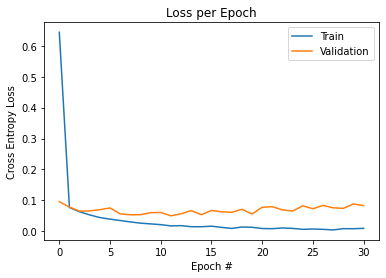

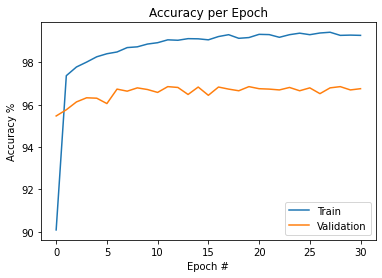

Train_Accuracy: 99.279% Val_Accuracy: 96.758%


In [ ]:
## trying out different parameters to see what works well manually, used in final model below##
valid_accuracy, train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid()
plot_loss()
plot_accuracy()
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]), end= ' ')
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))

In [ ]:
## using the optimal parameter model on test set to classify unseen data and produce the confusion matrix ##

def test():
    
    
    with torch.no_grad():
      model.eval ()
      test_loss = 0
      test_accuracy = 0

      batch_prediction = []
      batch_label = []

      for batch , (xs , ys) in enumerate(fm1_testloader):
        
        output = model(xs) 
        loss = criterion(output , ys.long())
        
        test_loss = test_loss + loss.item()
        test_accuracy = test_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1)==ys).item()/BATCH_SIZE  

        # max returns (value ,index)
        _, predict = torch.max(output.data, 1)
        batch_prediction += predict # creates a list of tensors of size 128, for each batch
        batch_label += ys.long()
      
        
      predictions = torch.flatten(torch.stack(batch_prediction)) # stack the tensors into a single tensor and flatten the tensor
      labels = torch.flatten(torch.stack(batch_label))

      confusion = confusion_matrix(labels, predictions) # produce confusion matrix 

      print("Test_Loss: {:.3f}".format(test_loss/len(fm1_testloader)), end= ' ')
      print("Test_Accuracy: {:.3f}".format(test_accuracy/len(fm1_testloader)))

    return test_loss, test_accuracy, confusion

In [ ]:
## confustion matrix plot ##

MNIST_1_lab = ['T-shirt/top', 'Trouser', 'Coat', 'Sandal', 'Bag'] # labels for the MNIST-1 set
MNIST_2_lab = ['Pullover', 'Dress', 'Shirt', 'Sneaker', 'Ankle boot'] # labels for the MNIST-2 set

def plot_confusion(labels = MNIST_1_lab):
  
  plt.subplots(figsize = (8,6)) # plot heatmap of confusion matrix
  ax = sns.heatmap(confusion, annot=True, fmt = 'g', cmap = 'Blues')
  ax.set_xlabel('Predicted')
  ax.set_xticklabels(labels, rotation = 90)

  ax.set_ylabel('Actual')
  ax.set_yticklabels(labels, rotation = 360)

  # MNIST-1 has the following classes: [0, 1, 4, 5, 8]
  # MNIST-2 has the following classes: [2, 3, 6, 7, 9]
  # Fashion MNIST class labels [0 - 9] = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Epoch: 0/30.............  Train_Loss: 0.333 Train_Accuracy: 0.938 Val_Loss: 0.076 Val_Accuracy: 0.962
Epoch: 1/30.............  Train_Loss: 0.059 Train_Accuracy: 0.978 Val_Loss: 0.060 Val_Accuracy: 0.965
Epoch: 2/30.............  Train_Loss: 0.041 Train_Accuracy: 0.983 Val_Loss: 0.052 Val_Accuracy: 0.968
Epoch: 3/30.............  Train_Loss: 0.036 Train_Accuracy: 0.985 Val_Loss: 0.055 Val_Accuracy: 0.968
Epoch: 4/30.............  Train_Loss: 0.025 Train_Accuracy: 0.989 Val_Loss: 0.047 Val_Accuracy: 0.970
Epoch: 5/30.............  Train_Loss: 0.021 Train_Accuracy: 0.989 Val_Loss: 0.053 Val_Accuracy: 0.968
Epoch: 6/30.............  Train_Loss: 0.018 Train_Accuracy: 0.990 Val_Loss: 0.067 Val_Accuracy: 0.965
Epoch: 7/30.............  Train_Loss: 0.017 Train_Accuracy: 0.990 Val_Loss: 0.065 Val_Accuracy: 0.968
Epoch: 8/30.............  Train_Loss: 0.013 Train_Accuracy: 0.992 Val_Loss: 0.062 Val_Accuracy: 0.966
Epoch: 9/30.............  Train_Loss: 0.010 Train_Accuracy: 0.993 Val_Loss: 0.066 

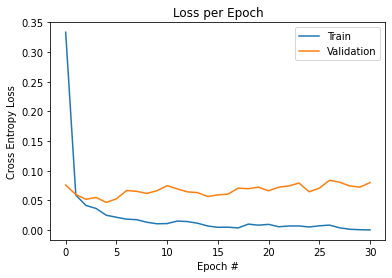

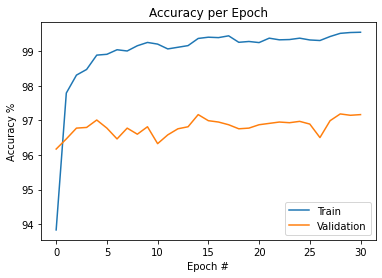

Test_Loss: 0.067 Test_Accuracy: 0.966
The final accuracies are:
Train_Accuracy: 99.550% Val_Accuracy: 97.168%
Test_Accuracy: 96.621%


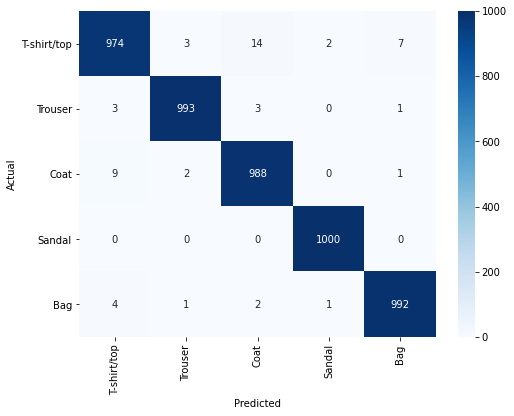

In [ ]:
## train, validate and test ##

# training
valid_accuracy, train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid()

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy, confusion = test()

# print final training, validation and test accuracies 
print("The final accuracies are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]), end= ' ')
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))


# plot conusion matrix
plot_confusion()


# 3.2 Convolutional neural network variants

In [ ]:
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./train-images-idx3-ubyte.gz # ! linux comand line
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./train-labels-idx1-ubyte.gz # curl is to grab someting from the internet 
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./t10k-images-idx3-ubyte.gz
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./t10k-labels-idx1-ubyte.gz

In [ ]:
!gzip -d train-labels-idx1-ubyte.gz # uncompress with gzip
!gzip -d train-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz

In [ ]:
!pip install idx2numpy

In [ ]:
import idx2numpy
import numpy as np

In [ ]:
vanillaxs = idx2numpy.convert_from_file('./train-images-idx3-ubyte') # saved the numpy variable to a file
vanillays = idx2numpy.convert_from_file('./train-labels-idx1-ubyte')


fmtrainxs = vanillaxs[0: 50000, :, :]
fmtrainys = vanillays[0: 50000]
fmvalidxs = vanillaxs[50000:, :, :]
fmvalidys = vanillays[50000:]

fmtestxs = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte')
fmtestys = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte')

print(vanillaxs.shape)
print(vanillays.shape)

print(fmtrainxs.shape)
print(fmtrainys.shape)

print(fmvalidxs.shape)
print(fmvalidys.shape)

print(fmtestxs.shape)
print(fmtestys.shape)


(60000, 28, 28)
(60000,)
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [ ]:
!pip install idx2numpy

print("Whole data shape")
print(vanillaxs.shape)
print(vanillays.shape)
print()

print("Train data shape")
print(fmtrainxs.shape)
print(fmtrainys.shape)
print()

print("Validation data shape")
print(fmvalidxs.shape)
print(fmvalidys.shape)
print()

print("Test data shape")
print(fmtestxs.shape)
print(fmtestys.shape)
print()

Whole data shape
(60000, 28, 28)
(60000,)

Train data shape
(50000, 28, 28)
(50000,)

Validation data shape
(10000, 28, 28)
(10000,)

Test data shape
(10000, 28, 28)
(10000,)



In [ ]:
def filter(xs, ys, lbls):
  idxs = [i for (i, y) in enumerate(ys) if y in lbls] #labels from the original dataset 
  xsprime = np.zeros((len(idxs), xs.shape[1],xs.shape[2]))

  for (i, j) in enumerate(idxs):
    xsprime[i, :, :] = xs[j, :, :]

  ymap = dict([(y, yprime) for (yprime, y) in enumerate(lbls)])
  ysprime = [ymap[y] for y in ys[idxs]] #0,1,4,5,8 to 0,1,2,3,4

  return np.array(xsprime), np.array(ysprime) # gets us a 3 tensor and this is a 1-tensor 


fm1lbls = [0, 1, 4, 5, 8]
fm1trainxs, fm1trainys = filter(fmtrainxs, fmtrainys, fm1lbls)
fm1validxs, fm1validys = filter(fmvalidxs, fmvalidys, fm1lbls)
fm1testxs, fm1testys = filter(fmtestxs, fmtestys, fm1lbls)


print("fm1 train shape")
print(fm1trainxs.shape)
print(fm1trainys.shape)
print()

print("fm1 valid shape")
print(fm1validxs.shape)
print(fm1validys.shape)
print()

print("fm1 test shape")
print(fm1testxs.shape)
print(fm1testys.shape)
print()

fm1 train shape
(24975, 28, 28)
(24975,)

fm1 valid shape
(5025, 28, 28)
(5025,)

fm1 test shape
(5000, 28, 28)
(5000,)



In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU IS AVAILABLE :D') 
else:  
    device = torch.device("cpu") 
    print('GPU not available')

GPU IS AVAILABLE :D


In [ ]:
fm1trainys.shape

(24975,)

In [ ]:
fm1_trainx_tensor = torch.tensor(fm1trainxs, dtype = torch.float).view(-1,1,28,28).to(device)
fm1_trainy_tensor = torch.tensor(fm1trainys).to(device)
fm1_valx_tensor = torch.tensor(fm1validxs , dtype = torch.float).view(-1,1,28,28).to(device)
fm1_valy_tensor = torch.tensor(fm1validys).to(device)
fm1_testx_tensor = torch.tensor(fm1testxs , dtype = torch.float).view(-1,1,28,28).to(device)
fm1_testy_tensor = torch.tensor(fm1testys).to(device)

In [ ]:
print(fm1_trainx_tensor.shape) # correct shapes 
print(fm1_valx_tensor.shape)
print(fm1_testx_tensor.shape)

torch.Size([24975, 1, 28, 28])
torch.Size([5025, 1, 28, 28])
torch.Size([5000, 1, 28, 28])


In [ ]:
BATCH_SIZE = 256 # initialize batch size

fm1_trainset = torch.utils.data.TensorDataset(fm1_trainx_tensor, fm1_trainy_tensor) # Handles the batchng of the data
fm1_valset = torch.utils.data.TensorDataset(fm1_valx_tensor, fm1_valy_tensor)
fm1_testset = torch.utils.data.TensorDataset(fm1_testx_tensor, fm1_testy_tensor)
# data set organises the data in one veriable per pair of data sets for x and y
fm1_trainloader = torch.utils.data.DataLoader(fm1_trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
fm1_valloader = torch.utils.data.DataLoader(fm1_valset, batch_size= BATCH_SIZE, shuffle=True, num_workers=0)
fm1_testloader = torch.utils.data.DataLoader(fm1_testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0) # num_workers =0 it means CPU is used for datloading not GPU, but 2 in CPU mode then you can use 2 processes
# organises the variable data saved in terms of batches when loading 


In [ ]:
## calculates the final dimension of the image after the final pooling ##

height = 28 # image is 28x28 pixels height = width
convlayer = 5 # number of convolutional layers in network
kernel = 3  # filter size height = width
pad = 1
stride = 1

for i in range(convlayer):
  height = (height + (2 * pad) - kernel + 1)//(stride * 2)
print(height)

0


In [ ]:
class CNN(nn.Module):
  def __init__(self, d):
    super(CNN, self).__init__() # without padding kernel dedicates 1 from each dimension of width and height 
    self.conv1 = nn.Conv2d(1, 20, kernel_size = 3, padding=(1,1))  # we specify (input_channels, out_channels)
    self.conv2 = nn.Conv2d(20,40, kernel_size = 3, padding=(1,1)) # Padding adds a dimension on the left and right 
    self.dropout = nn.Dropout2d(d) # % pixels remaining
    self.pool = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(40*7*7,50) # fully connected layers # 28 /2 =  14 . 14/2 = 7
    self.fc2 = nn.Linear(50,5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
    x = self.dropout(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view(-1, 40 * 7* 7) # flatten tensor
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x


In [ ]:
class CNN_3(nn.Module):
  def __init__(self, d):
    super(CNN_3, self).__init__() # without padding kernel dedicates 1 from each dimension of width and height 
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = (1,1))  # we specify (input_channels, out_channels)
    self.conv2 = nn.Conv2d(10,50, kernel_size = 3, padding = (1,1)) # Padding adds a dimension on the left and right 
    self.conv3 = nn.Conv2d(50,20, kernel_size = 3, padding = (1,1))
    self.dropout = nn.Dropout2d(d) 
    self.pool = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(20*3*3,50) 
    self.fc2 = nn.Linear(50,5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
    x = self.dropout(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x)
    x = x.view(-1, 20 * 3* 3) # flatten tensor
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [ ]:
class CNN_5(nn.Module):
  def __init__(self, d):
    super(CNN_5, self).__init__() # without padding kernel dedicates 1 from each dimension of width and height 
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = (3,3))  # we specify (input_channels, out_channels)
    self.conv2 = nn.Conv2d(10,50, kernel_size = 3, padding = (3,3)) # Padding adds a dimension on the left and right 
    self.conv3 = nn.Conv2d(50,40, kernel_size = 3, padding = (3,3))
    self.conv4 = nn.Conv2d(40,30, kernel_size = 3, padding = (3,3))
    self.conv5 = nn.Conv2d(30,20, kernel_size = 3, padding = (3,3))
    self.dropout = nn.Dropout2d(d) 
    self.pool = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(20*4*4,50) 
    self.fc2 = nn.Linear(50,5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
    x = self.dropout(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = F.relu(self.conv4(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = F.relu(self.conv5(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = x.view(-1, 20 * 4* 4) # flatten tensor
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [ ]:
## function enables the selection of different number of covolutional layers ##

def network(num_conv = 2, d = 0):
  if num_conv == 2:
    model = CNN(d) 
  elif num_conv == 3:
    model = CNN_3(d)
  elif num_conv == 5:
    model = CNN_5(d)
  else:
    print("enter 2, 3 or 5")
  return model

In [ ]:
# cross entropy loss
criterion = nn.CrossEntropyLoss()

In [ ]:
## optimisers ##

# l2 regularisation added manually into training section instead of within optimiser, this is so that it can be turned off

# Adam, RMSprop and SGD optimisers defined below

def optim_adam(learning_rate):
  optim_a = torch.optim.Adam(model.parameters(), lr = learning_rate)
  return optim_a

def optim_rms(learning_rate):
  optim_r = torch.optim.RMSprop(model.parameters(), lr = learning_rate)
  return optim_r

def optim_sgd(learning_rate):
  optim_s = torch.optim.SGD(model.parameters(), lr = learning_rate)
  return optim_s

# this function will be used to select which optimiser is to be used

def optim(version = 'Adam', learning_rate = 0.001):
  if version == 'Adam':
    optimizer = optim_adam(learning_rate)
  elif version == 'RMSprop':
    optimizer = optim_rms(learning_rate)
  elif version == 'SGD':
    optimizer = optim_sgd(learning_rate)
  else:
    print('options include: Adam, RMSprop and SGD')
  return optimizer

In [ ]:
## function to train the model and validate it ## 

def train_valid(num_epoch = 30, lam = 0):

  #optimizer = optim()  # calling specified optimiser

  #initialize empty lists to store values for plots
  epoch_num = [] 
  train_l = []
  train_acc = []
  valid_l = []
  valid_acc = []


  # Training Run. hidden - just hidden states into the next
  for epoch in range(num_epoch+1):
    
    # training
    model.train()
    train_loss = 0
    train_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_trainloader):
      
      optimizer.zero_grad() # clears the gradient from the
      output = model(xs) # so coming in of length
      
      l2 = 0
      for p in model.parameters():
        l2 = l2 + (torch.norm(p)**2)

      loss = criterion(output , ys.long()) # loss without regulariser (as specified in question)
      loss_r = loss + (l2 * lam) # loss with l2 regulariser

      loss_r.backward() 
      optimizer.step() # updating the weights in steps
      train_loss = train_loss + loss.item() # stores loss (without regulariser)
      train_accuracy = train_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1) ==ys).item()/BATCH_SIZE # batch accuracy #.view(-1, 5   ,  1 )[:,-1,:],1).indices

    # update initialized lists    
    train_l.append(train_loss/len(fm1_trainloader)) 
    train_acc.append(train_accuracy/len(fm1_trainloader)*100)


    # validation

    model.eval ()
    valid_loss = 0
    valid_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_valloader):
      output = model(xs) # so coming in of length
      loss = criterion(output , ys.long())
      #log data
      #aggregate batch performance
      valid_loss = valid_loss + loss.item()
      valid_accuracy = valid_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1)==ys).item()/BATCH_SIZE  # we use full batch in

    # update initialized lists    
    epoch_num.append(epoch)
    valid_l.append(valid_loss/len(fm1_valloader))
    valid_acc.append(valid_accuracy/len(fm1_valloader)*100)

    # print summary for each epoch
    print("Epoch: {}/{}............. ".format(epoch , num_epoch), end= ' ')
    print("Train_Loss: {:.3f}".format(train_loss/len(fm1_trainloader)), end= ' ')
    print("Train_Accuracy: {:.3f}".format(train_accuracy/len(fm1_trainloader)), end= ' ')
    print("Val_Loss: {:.3f}".format(valid_loss/len(fm1_valloader)), end= ' ')
    print("Val_Accuracy: {:.3f}".format(valid_accuracy/len(fm1_valloader)))

  return train_l, train_acc, valid_l, valid_acc, epoch_num

In [ ]:
## function to plot loss for training and validation sets ##

def plot_loss():  
  plt.plot(range(len(train_l)), train_l, label = "Train")
  plt.plot(range(len(valid_l)), valid_l, label = "Validation")
  plt.title("Loss per Epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("Cross Entropy Loss")
  plt.legend()
  plt.show()

In [ ]:
## function to plot accuracy for training and validation sets ##

def plot_accuracy():
  plt.plot(range(len(train_acc)), train_acc, label = "Train")
  plt.plot(range(len(valid_acc)), valid_acc, label = "Validation")
  plt.title("Accuracy per Epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("Accuracy %")
  plt.legend()
  plt.show()

In [ ]:
## using the optimal parameter model on test set to classify unseen data and produce the confusion matrix ##

def test():

    
    with torch.no_grad():
      model.eval ()
      test_loss = 0
      test_accuracy = 0

      batch_prediction = []
      batch_label = []

      for batch , (xs , ys) in enumerate(fm1_testloader):
        
        output = model(xs) 
        loss = criterion(output , ys.long())
        
        test_loss = test_loss + loss.item()
        test_accuracy = test_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1)==ys).item()/BATCH_SIZE  

        # max returns (value ,index)
        _, predict = torch.max(output.data, 1)
        batch_prediction += predict # creates a list of tensors of size 128, for each batch
        batch_label += ys.long()

    return test_loss, test_accuracy

**Iteration 1, Name = Optim1**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = Adam
* Learning rate = 0.001
* Number of epochs = 100
* L2 regularisation lambda = 0
* Momentum = N/A





Epoch: 0/100.............  Train_Loss: 0.603 Train_Accuracy: 0.908 Val_Loss: 0.071 Val_Accuracy: 0.962
Epoch: 1/100.............  Train_Loss: 0.057 Train_Accuracy: 0.978 Val_Loss: 0.057 Val_Accuracy: 0.966
Epoch: 2/100.............  Train_Loss: 0.040 Train_Accuracy: 0.983 Val_Loss: 0.049 Val_Accuracy: 0.970
Epoch: 3/100.............  Train_Loss: 0.031 Train_Accuracy: 0.986 Val_Loss: 0.053 Val_Accuracy: 0.967
Epoch: 4/100.............  Train_Loss: 0.027 Train_Accuracy: 0.988 Val_Loss: 0.049 Val_Accuracy: 0.969
Epoch: 5/100.............  Train_Loss: 0.020 Train_Accuracy: 0.989 Val_Loss: 0.055 Val_Accuracy: 0.969
Epoch: 6/100.............  Train_Loss: 0.018 Train_Accuracy: 0.990 Val_Loss: 0.050 Val_Accuracy: 0.968
Epoch: 7/100.............  Train_Loss: 0.014 Train_Accuracy: 0.992 Val_Loss: 0.043 Val_Accuracy: 0.970
Epoch: 8/100.............  Train_Loss: 0.011 Train_Accuracy: 0.992 Val_Loss: 0.047 Val_Accuracy: 0.970
Epoch: 9/100.............  Train_Loss: 0.010 Train_Accuracy: 0.993 Val_Lo

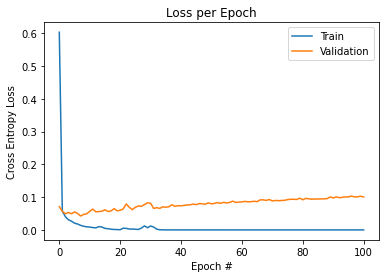

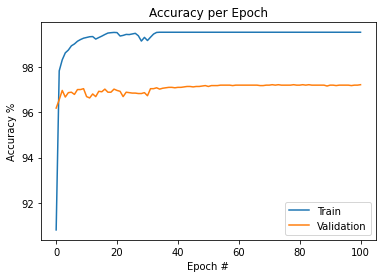

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 97.227%
Val_Loss: 0.100
Test_Accuracy: 96.562%
Test_Loss 0.103


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'Adam', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 100, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

Try SGD with everything else kept the same

**Iteration 2, Name = optim2**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 50
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/100.............  Train_Loss: 0.449 Train_Accuracy: 0.887 Val_Loss: 0.173 Val_Accuracy: 0.930
Epoch: 1/100.............  Train_Loss: 0.158 Train_Accuracy: 0.951 Val_Loss: 0.141 Val_Accuracy: 0.936
Epoch: 2/100.............  Train_Loss: 0.129 Train_Accuracy: 0.959 Val_Loss: 0.124 Val_Accuracy: 0.944
Epoch: 3/100.............  Train_Loss: 0.114 Train_Accuracy: 0.964 Val_Loss: 0.112 Val_Accuracy: 0.948
Epoch: 4/100.............  Train_Loss: 0.105 Train_Accuracy: 0.965 Val_Loss: 0.103 Val_Accuracy: 0.950
Epoch: 5/100.............  Train_Loss: 0.097 Train_Accuracy: 0.967 Val_Loss: 0.099 Val_Accuracy: 0.952
Epoch: 6/100.............  Train_Loss: 0.091 Train_Accuracy: 0.969 Val_Loss: 0.107 Val_Accuracy: 0.949
Epoch: 7/100.............  Train_Loss: 0.085 Train_Accuracy: 0.971 Val_Loss: 0.098 Val_Accuracy: 0.954
Epoch: 8/100.............  Train_Loss: 0.081 Train_Accuracy: 0.972 Val_Loss: 0.087 Val_Accuracy: 0.954
Epoch: 9/100.............  Train_Loss: 0.077 Train_Accuracy: 0.973 Val_Lo

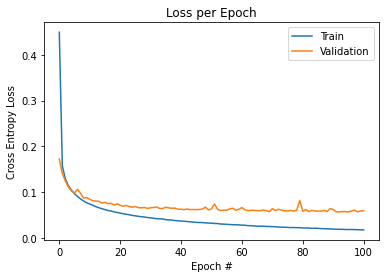

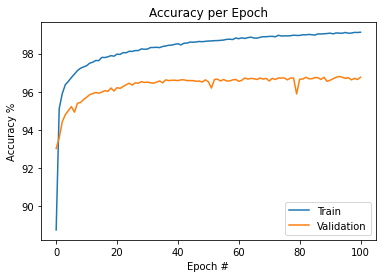

The final accuracies and losses are:
Train_Accuracy: 99.127%
Train_Loss: 0.018
Val_Accuracy: 96.758%
Val_Loss: 0.060
Test_Accuracy: 95.898%
Test_Loss 0.052


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 100, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

Validation loss lower for SGD than Adam. Try RMSprop

**Iteration 3, Name = optim3**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = RMSprop
* Learning rate = 0.001
* Number of epochs = 100
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/100.............  Train_Loss: 1.140 Train_Accuracy: 0.931 Val_Loss: 0.089 Val_Accuracy: 0.956
Epoch: 1/100.............  Train_Loss: 0.071 Train_Accuracy: 0.974 Val_Loss: 0.075 Val_Accuracy: 0.960
Epoch: 2/100.............  Train_Loss: 0.058 Train_Accuracy: 0.979 Val_Loss: 0.071 Val_Accuracy: 0.963
Epoch: 3/100.............  Train_Loss: 0.056 Train_Accuracy: 0.979 Val_Loss: 0.069 Val_Accuracy: 0.966
Epoch: 4/100.............  Train_Loss: 0.040 Train_Accuracy: 0.983 Val_Loss: 0.101 Val_Accuracy: 0.951
Epoch: 5/100.............  Train_Loss: 0.036 Train_Accuracy: 0.985 Val_Loss: 0.060 Val_Accuracy: 0.967
Epoch: 6/100.............  Train_Loss: 0.030 Train_Accuracy: 0.986 Val_Loss: 0.065 Val_Accuracy: 0.965
Epoch: 7/100.............  Train_Loss: 0.072 Train_Accuracy: 0.978 Val_Loss: 0.059 Val_Accuracy: 0.967
Epoch: 8/100.............  Train_Loss: 0.025 Train_Accuracy: 0.988 Val_Loss: 0.056 Val_Accuracy: 0.968
Epoch: 9/100.............  Train_Loss: 0.019 Train_Accuracy: 0.989 Val_Lo

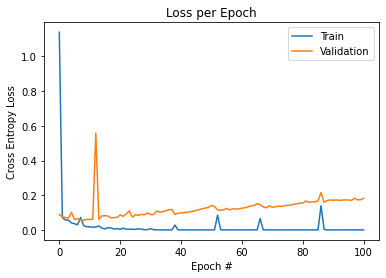

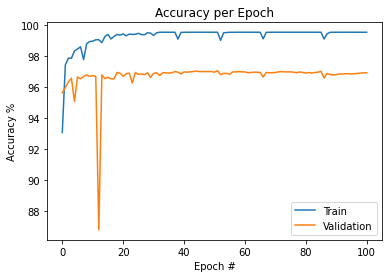

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 96.934%
Val_Loss: 0.182
Test_Accuracy: 96.445%
Test_Loss 0.164


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'RMSprop', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 100, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

SGD appears to be best optimiser for lowest loss, it also appears that it doesnt ovefit.
Adam achieves highest accuracy. Change the Optimiser to SGD going forward.

See if a lower loss is achieved with fewer or more epochs.

**Iteration 4, Name = Epoch1**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 50
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/50.............  Train_Loss: 0.788 Train_Accuracy: 0.888 Val_Loss: 0.143 Val_Accuracy: 0.939
Epoch: 1/50.............  Train_Loss: 0.126 Train_Accuracy: 0.960 Val_Loss: 0.109 Val_Accuracy: 0.950
Epoch: 2/50.............  Train_Loss: 0.101 Train_Accuracy: 0.967 Val_Loss: 0.096 Val_Accuracy: 0.953
Epoch: 3/50.............  Train_Loss: 0.088 Train_Accuracy: 0.972 Val_Loss: 0.089 Val_Accuracy: 0.955
Epoch: 4/50.............  Train_Loss: 0.081 Train_Accuracy: 0.974 Val_Loss: 0.089 Val_Accuracy: 0.956
Epoch: 5/50.............  Train_Loss: 0.074 Train_Accuracy: 0.975 Val_Loss: 0.079 Val_Accuracy: 0.958
Epoch: 6/50.............  Train_Loss: 0.070 Train_Accuracy: 0.976 Val_Loss: 0.076 Val_Accuracy: 0.959
Epoch: 7/50.............  Train_Loss: 0.066 Train_Accuracy: 0.977 Val_Loss: 0.075 Val_Accuracy: 0.959
Epoch: 8/50.............  Train_Loss: 0.063 Train_Accuracy: 0.978 Val_Loss: 0.074 Val_Accuracy: 0.959
Epoch: 9/50.............  Train_Loss: 0.060 Train_Accuracy: 0.978 Val_Loss: 0.073 

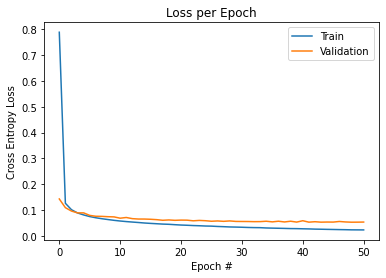

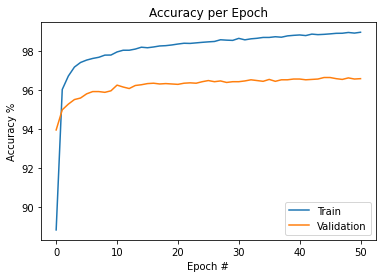

The final accuracies and losses are:
Train_Accuracy: 98.968%
Train_Loss: 0.023
Val_Accuracy: 96.582%
Val_Loss: 0.053
Test_Accuracy: 96.055%
Test_Loss 0.057


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 50, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 5, Name = Epoch2**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0


Epoch: 0/200.............  Train_Loss: 0.585 Train_Accuracy: 0.891 Val_Loss: 0.149 Val_Accuracy: 0.941
Epoch: 1/200.............  Train_Loss: 0.128 Train_Accuracy: 0.960 Val_Loss: 0.117 Val_Accuracy: 0.949
Epoch: 2/200.............  Train_Loss: 0.103 Train_Accuracy: 0.967 Val_Loss: 0.104 Val_Accuracy: 0.952
Epoch: 3/200.............  Train_Loss: 0.093 Train_Accuracy: 0.971 Val_Loss: 0.096 Val_Accuracy: 0.953
Epoch: 4/200.............  Train_Loss: 0.085 Train_Accuracy: 0.972 Val_Loss: 0.091 Val_Accuracy: 0.957
Epoch: 5/200.............  Train_Loss: 0.079 Train_Accuracy: 0.973 Val_Loss: 0.084 Val_Accuracy: 0.957
Epoch: 6/200.............  Train_Loss: 0.074 Train_Accuracy: 0.975 Val_Loss: 0.080 Val_Accuracy: 0.956
Epoch: 7/200.............  Train_Loss: 0.072 Train_Accuracy: 0.976 Val_Loss: 0.079 Val_Accuracy: 0.959
Epoch: 8/200.............  Train_Loss: 0.068 Train_Accuracy: 0.977 Val_Loss: 0.075 Val_Accuracy: 0.958
Epoch: 9/200.............  Train_Loss: 0.066 Train_Accuracy: 0.977 Val_Lo

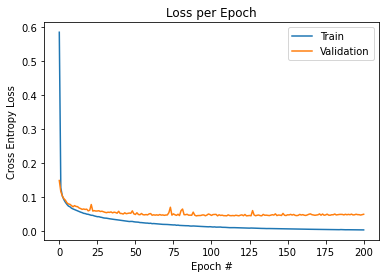

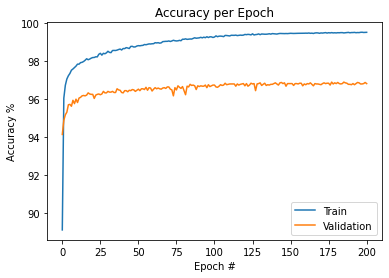

The final accuracies and losses are:
Train_Accuracy: 99.514%
Train_Loss: 0.004
Val_Accuracy: 96.816%
Val_Loss: 0.050
Test_Accuracy: 96.113%
Test_Loss 0.052


In [ ]:

# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 6, Name = LR1**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.01
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/200.............  Train_Loss: 3.552 Train_Accuracy: 0.784 Val_Loss: 0.199 Val_Accuracy: 0.926
Epoch: 1/200.............  Train_Loss: 0.144 Train_Accuracy: 0.952 Val_Loss: 0.118 Val_Accuracy: 0.948
Epoch: 2/200.............  Train_Loss: 0.105 Train_Accuracy: 0.965 Val_Loss: 0.112 Val_Accuracy: 0.949
Epoch: 3/200.............  Train_Loss: 0.090 Train_Accuracy: 0.970 Val_Loss: 0.101 Val_Accuracy: 0.954
Epoch: 4/200.............  Train_Loss: 0.080 Train_Accuracy: 0.972 Val_Loss: 0.086 Val_Accuracy: 0.957
Epoch: 5/200.............  Train_Loss: 0.071 Train_Accuracy: 0.975 Val_Loss: 0.090 Val_Accuracy: 0.956
Epoch: 6/200.............  Train_Loss: 0.066 Train_Accuracy: 0.977 Val_Loss: 0.081 Val_Accuracy: 0.958
Epoch: 7/200.............  Train_Loss: 0.062 Train_Accuracy: 0.977 Val_Loss: 0.074 Val_Accuracy: 0.959
Epoch: 8/200.............  Train_Loss: 0.057 Train_Accuracy: 0.979 Val_Loss: 0.077 Val_Accuracy: 0.959
Epoch: 9/200.............  Train_Loss: 0.054 Train_Accuracy: 0.980 Val_Lo

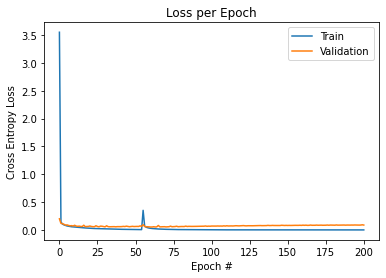

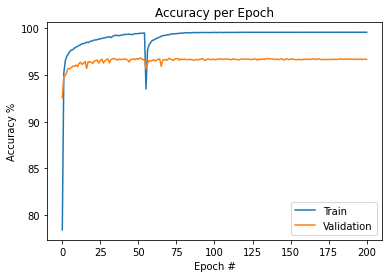

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 96.660%
Val_Loss: 0.088
Test_Accuracy: 96.328%
Test_Loss 0.089


In [ ]:

# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.01)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 7, Name = LR2**

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.0001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/200.............  Train_Loss: 0.746 Train_Accuracy: 0.797 Val_Loss: 0.311 Val_Accuracy: 0.891
Epoch: 1/200.............  Train_Loss: 0.268 Train_Accuracy: 0.914 Val_Loss: 0.243 Val_Accuracy: 0.907
Epoch: 2/200.............  Train_Loss: 0.217 Train_Accuracy: 0.929 Val_Loss: 0.202 Val_Accuracy: 0.923
Epoch: 3/200.............  Train_Loss: 0.191 Train_Accuracy: 0.938 Val_Loss: 0.183 Val_Accuracy: 0.929
Epoch: 4/200.............  Train_Loss: 0.173 Train_Accuracy: 0.945 Val_Loss: 0.168 Val_Accuracy: 0.932
Epoch: 5/200.............  Train_Loss: 0.161 Train_Accuracy: 0.948 Val_Loss: 0.157 Val_Accuracy: 0.937
Epoch: 6/200.............  Train_Loss: 0.151 Train_Accuracy: 0.951 Val_Loss: 0.149 Val_Accuracy: 0.940
Epoch: 7/200.............  Train_Loss: 0.143 Train_Accuracy: 0.954 Val_Loss: 0.142 Val_Accuracy: 0.942
Epoch: 8/200.............  Train_Loss: 0.137 Train_Accuracy: 0.955 Val_Loss: 0.137 Val_Accuracy: 0.943
Epoch: 9/200.............  Train_Loss: 0.132 Train_Accuracy: 0.957 Val_Lo

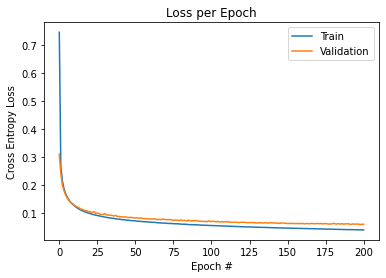

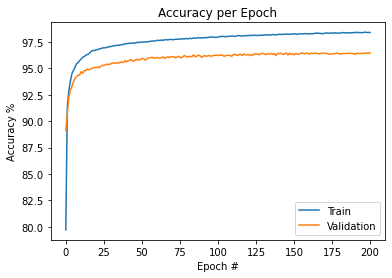

The final accuracies and losses are:
Train_Accuracy: 98.386%
Train_Loss: 0.041
Val_Accuracy: 96.465%
Val_Loss: 0.061
Test_Accuracy: 95.879%
Test_Loss 0.060


In [ ]:

# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.0001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 8, Name = LR3**
*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.00015
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/200.............  Train_Loss: 0.629 Train_Accuracy: 0.870 Val_Loss: 0.223 Val_Accuracy: 0.915
Epoch: 1/200.............  Train_Loss: 0.189 Train_Accuracy: 0.941 Val_Loss: 0.178 Val_Accuracy: 0.929
Epoch: 2/200.............  Train_Loss: 0.155 Train_Accuracy: 0.951 Val_Loss: 0.156 Val_Accuracy: 0.933
Epoch: 3/200.............  Train_Loss: 0.137 Train_Accuracy: 0.956 Val_Loss: 0.141 Val_Accuracy: 0.938
Epoch: 4/200.............  Train_Loss: 0.125 Train_Accuracy: 0.960 Val_Loss: 0.135 Val_Accuracy: 0.940
Epoch: 5/200.............  Train_Loss: 0.117 Train_Accuracy: 0.962 Val_Loss: 0.127 Val_Accuracy: 0.943
Epoch: 6/200.............  Train_Loss: 0.111 Train_Accuracy: 0.965 Val_Loss: 0.122 Val_Accuracy: 0.946
Epoch: 7/200.............  Train_Loss: 0.106 Train_Accuracy: 0.965 Val_Loss: 0.120 Val_Accuracy: 0.947
Epoch: 8/200.............  Train_Loss: 0.101 Train_Accuracy: 0.967 Val_Loss: 0.114 Val_Accuracy: 0.948
Epoch: 9/200.............  Train_Loss: 0.098 Train_Accuracy: 0.968 Val_Lo

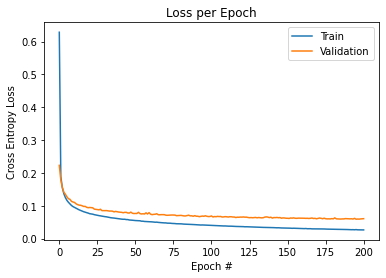

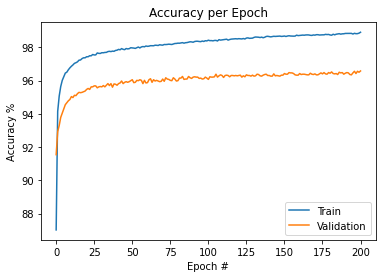

The final accuracies and losses are:
Train_Accuracy: 98.912%
Train_Loss: 0.027
Val_Accuracy: 96.582%
Val_Loss: 0.061
Test_Accuracy: 95.938%
Test_Loss 0.060


In [ ]:

# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.00015)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 9, Name = Layer1**

*Parameters:*

* Number of convolutional layers = 3
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0


Epoch: 0/200.............  Train_Loss: 0.585 Train_Accuracy: 0.822 Val_Loss: 0.270 Val_Accuracy: 0.910
Epoch: 1/200.............  Train_Loss: 0.242 Train_Accuracy: 0.926 Val_Loss: 0.213 Val_Accuracy: 0.916
Epoch: 2/200.............  Train_Loss: 0.192 Train_Accuracy: 0.938 Val_Loss: 0.183 Val_Accuracy: 0.926
Epoch: 3/200.............  Train_Loss: 0.166 Train_Accuracy: 0.947 Val_Loss: 0.153 Val_Accuracy: 0.935
Epoch: 4/200.............  Train_Loss: 0.147 Train_Accuracy: 0.952 Val_Loss: 0.143 Val_Accuracy: 0.940
Epoch: 5/200.............  Train_Loss: 0.135 Train_Accuracy: 0.955 Val_Loss: 0.132 Val_Accuracy: 0.941
Epoch: 6/200.............  Train_Loss: 0.124 Train_Accuracy: 0.960 Val_Loss: 0.122 Val_Accuracy: 0.945
Epoch: 7/200.............  Train_Loss: 0.116 Train_Accuracy: 0.961 Val_Loss: 0.116 Val_Accuracy: 0.947
Epoch: 8/200.............  Train_Loss: 0.111 Train_Accuracy: 0.963 Val_Loss: 0.114 Val_Accuracy: 0.946
Epoch: 9/200.............  Train_Loss: 0.106 Train_Accuracy: 0.965 Val_Lo

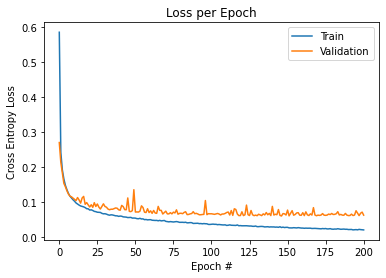

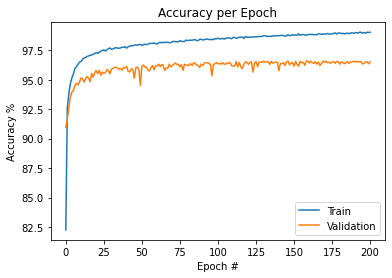

The final accuracies and losses are:
Train_Accuracy: 99.039%
Train_Loss: 0.020
Val_Accuracy: 96.523%
Val_Loss: 0.062
Test_Accuracy: 96.035%
Test_Loss 0.055


In [ ]:

# CNN
model = network(num_conv = 3, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 10, Name = Layer2**

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 1.510 Train_Accuracy: 0.415 Val_Loss: 1.378 Val_Accuracy: 0.579
Epoch: 1/200.............  Train_Loss: 1.157 Train_Accuracy: 0.761 Val_Loss: 0.854 Val_Accuracy: 0.831
Epoch: 2/200.............  Train_Loss: 0.606 Train_Accuracy: 0.870 Val_Loss: 0.414 Val_Accuracy: 0.888
Epoch: 3/200.............  Train_Loss: 0.344 Train_Accuracy: 0.912 Val_Loss: 0.275 Val_Accuracy: 0.911
Epoch: 4/200.............  Train_Loss: 0.260 Train_Accuracy: 0.927 Val_Loss: 0.231 Val_Accuracy: 0.923
Epoch: 5/200.............  Train_Loss: 0.233 Train_Accuracy: 0.931 Val_Loss: 0.212 Val_Accuracy: 0.928
Epoch: 6/200.............  Train_Loss: 0.202 Train_Accuracy: 0.938 Val_Loss: 0.204 Val_Accuracy: 0.922
Epoch: 7/200.............  Train_Loss: 0.189 Train_Accuracy: 0.941 Val_Loss: 0.345 Val_Accuracy: 0.850
Epoch: 8/200.............  Train_Loss: 0.225 Train_Accuracy: 0.934 Val_Loss: 0.171 Val_Accuracy: 0.929
Epoch: 9/200.............  Train_Loss: 0.168 Train_Accuracy: 0.946 Val_Lo

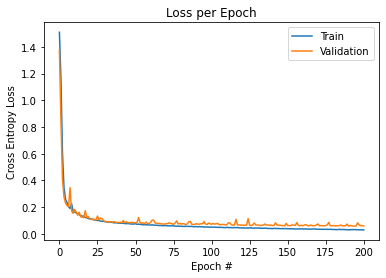

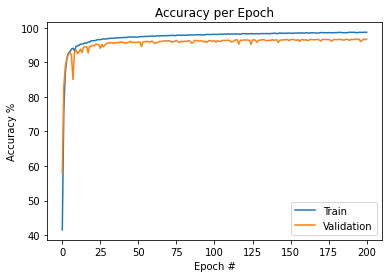

The final accuracies and losses are:
Train_Accuracy: 98.728%
Train_Loss: 0.028
Val_Accuracy: 96.777%
Val_Loss: 0.057
Test_Accuracy: 96.211%
Test_Loss 0.053


In [ ]:

# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

**Iteration 11, Name = Reg1**

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.01
* Momentum = 0


Epoch: 0/200.............  Train_Loss: 1.448 Train_Accuracy: 0.509 Val_Loss: 1.216 Val_Accuracy: 0.715
Epoch: 1/200.............  Train_Loss: 0.891 Train_Accuracy: 0.842 Val_Loss: 0.580 Val_Accuracy: 0.871
Epoch: 2/200.............  Train_Loss: 0.446 Train_Accuracy: 0.892 Val_Loss: 0.387 Val_Accuracy: 0.875
Epoch: 3/200.............  Train_Loss: 0.334 Train_Accuracy: 0.902 Val_Loss: 0.272 Val_Accuracy: 0.908
Epoch: 4/200.............  Train_Loss: 0.275 Train_Accuracy: 0.919 Val_Loss: 0.237 Val_Accuracy: 0.917
Epoch: 5/200.............  Train_Loss: 0.239 Train_Accuracy: 0.927 Val_Loss: 0.219 Val_Accuracy: 0.914
Epoch: 6/200.............  Train_Loss: 0.218 Train_Accuracy: 0.935 Val_Loss: 0.209 Val_Accuracy: 0.922
Epoch: 7/200.............  Train_Loss: 0.208 Train_Accuracy: 0.937 Val_Loss: 0.194 Val_Accuracy: 0.927
Epoch: 8/200.............  Train_Loss: 0.217 Train_Accuracy: 0.932 Val_Loss: 0.196 Val_Accuracy: 0.928
Epoch: 9/200.............  Train_Loss: 0.192 Train_Accuracy: 0.940 Val_Lo

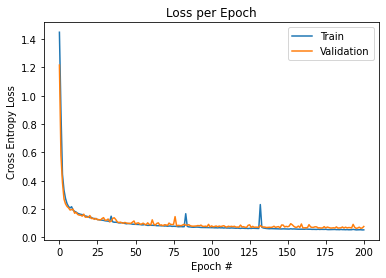

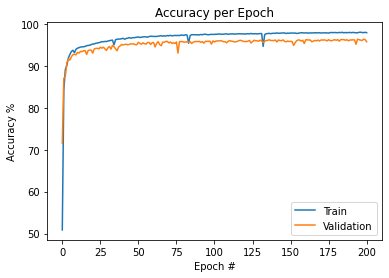

The final accuracies and losses are:
Train_Accuracy: 97.923%
Train_Loss: 0.054
Val_Accuracy: 95.762%
Val_Loss: 0.077
Test_Accuracy: 95.391%
Test_Loss 0.080


In [ ]:
# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.01)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 12, Name = Reg2** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.001 
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 1.530 Train_Accuracy: 0.442 Val_Loss: 1.414 Val_Accuracy: 0.610
Epoch: 1/200.............  Train_Loss: 1.212 Train_Accuracy: 0.715 Val_Loss: 0.931 Val_Accuracy: 0.828
Epoch: 2/200.............  Train_Loss: 0.659 Train_Accuracy: 0.871 Val_Loss: 0.447 Val_Accuracy: 0.865
Epoch: 3/200.............  Train_Loss: 0.394 Train_Accuracy: 0.890 Val_Loss: 0.320 Val_Accuracy: 0.903
Epoch: 4/200.............  Train_Loss: 0.303 Train_Accuracy: 0.910 Val_Loss: 0.247 Val_Accuracy: 0.911
Epoch: 5/200.............  Train_Loss: 0.250 Train_Accuracy: 0.925 Val_Loss: 0.217 Val_Accuracy: 0.919
Epoch: 6/200.............  Train_Loss: 0.222 Train_Accuracy: 0.931 Val_Loss: 0.212 Val_Accuracy: 0.920
Epoch: 7/200.............  Train_Loss: 0.205 Train_Accuracy: 0.936 Val_Loss: 0.189 Val_Accuracy: 0.924
Epoch: 8/200.............  Train_Loss: 0.191 Train_Accuracy: 0.939 Val_Loss: 0.185 Val_Accuracy: 0.918
Epoch: 9/200.............  Train_Loss: 0.185 Train_Accuracy: 0.940 Val_Lo

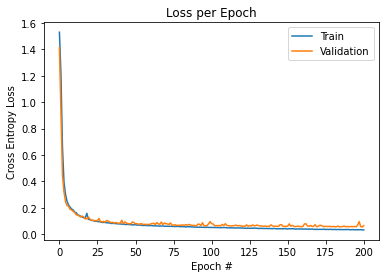

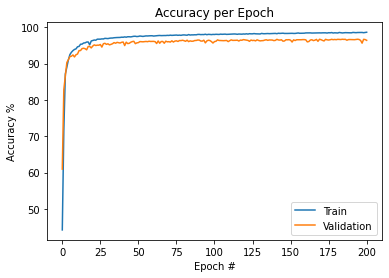

The final accuracies and losses are:
Train_Accuracy: 98.609%
Train_Loss: 0.033
Val_Accuracy: 96.387%
Val_Loss: 0.065
Test_Accuracy: 95.801%
Test_Loss 0.070


In [ ]:
# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.001)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 13, Name = Reg3** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.0001 
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 1.516 Train_Accuracy: 0.340 Val_Loss: 1.392 Val_Accuracy: 0.588
Epoch: 1/200.............  Train_Loss: 1.136 Train_Accuracy: 0.799 Val_Loss: 0.794 Val_Accuracy: 0.860
Epoch: 2/200.............  Train_Loss: 0.557 Train_Accuracy: 0.897 Val_Loss: 0.399 Val_Accuracy: 0.890
Epoch: 3/200.............  Train_Loss: 0.336 Train_Accuracy: 0.913 Val_Loss: 0.281 Val_Accuracy: 0.905
Epoch: 4/200.............  Train_Loss: 0.270 Train_Accuracy: 0.920 Val_Loss: 0.249 Val_Accuracy: 0.915
Epoch: 5/200.............  Train_Loss: 0.253 Train_Accuracy: 0.920 Val_Loss: 0.220 Val_Accuracy: 0.916
Epoch: 6/200.............  Train_Loss: 0.226 Train_Accuracy: 0.928 Val_Loss: 0.203 Val_Accuracy: 0.923
Epoch: 7/200.............  Train_Loss: 0.218 Train_Accuracy: 0.929 Val_Loss: 0.196 Val_Accuracy: 0.922
Epoch: 8/200.............  Train_Loss: 0.199 Train_Accuracy: 0.934 Val_Loss: 0.180 Val_Accuracy: 0.928
Epoch: 9/200.............  Train_Loss: 0.180 Train_Accuracy: 0.940 Val_Lo

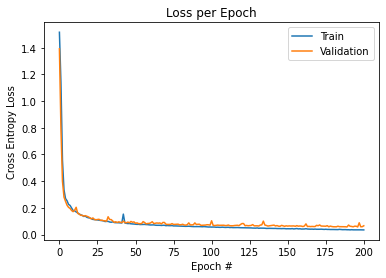

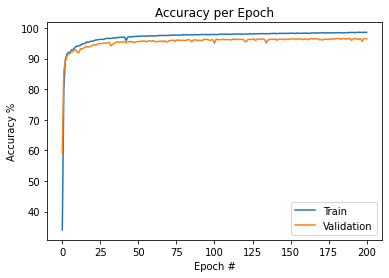

The final accuracies and losses are:
Train_Accuracy: 98.545%
Train_Loss: 0.034
Val_Accuracy: 96.406%
Val_Loss: 0.066
Test_Accuracy: 95.664%
Test_Loss 0.063


In [ ]:
# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.0001)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 14, Name = Drop1** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0.25
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 1.639 Train_Accuracy: 0.211 Val_Loss: 1.538 Val_Accuracy: 0.400
Epoch: 1/200.............  Train_Loss: 1.556 Train_Accuracy: 0.282 Val_Loss: 1.427 Val_Accuracy: 0.535
Epoch: 2/200.............  Train_Loss: 1.429 Train_Accuracy: 0.396 Val_Loss: 1.172 Val_Accuracy: 0.665
Epoch: 3/200.............  Train_Loss: 1.204 Train_Accuracy: 0.524 Val_Loss: 0.829 Val_Accuracy: 0.777
Epoch: 4/200.............  Train_Loss: 0.935 Train_Accuracy: 0.650 Val_Loss: 0.537 Val_Accuracy: 0.863
Epoch: 5/200.............  Train_Loss: 0.751 Train_Accuracy: 0.734 Val_Loss: 0.405 Val_Accuracy: 0.871
Epoch: 6/200.............  Train_Loss: 0.631 Train_Accuracy: 0.782 Val_Loss: 0.327 Val_Accuracy: 0.893
Epoch: 7/200.............  Train_Loss: 0.562 Train_Accuracy: 0.815 Val_Loss: 0.282 Val_Accuracy: 0.905
Epoch: 8/200.............  Train_Loss: 0.471 Train_Accuracy: 0.850 Val_Loss: 0.268 Val_Accuracy: 0.904
Epoch: 9/200.............  Train_Loss: 0.454 Train_Accuracy: 0.860 Val_Lo

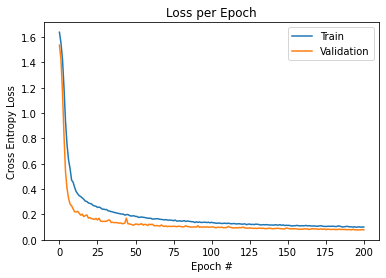

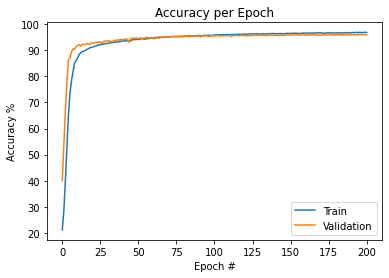

The final accuracies and losses are:
Train_Accuracy: 96.871%
Train_Loss: 0.100
Val_Accuracy: 95.957%
Val_Loss: 0.077
Test_Accuracy: 95.547%
Test_Loss 0.078


In [ ]:
# CNN
model = network(num_conv = 5, d = 0.25)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 15, Name = Drop2** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0.5
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 1.711 Train_Accuracy: 0.211 Val_Loss: 1.603 Val_Accuracy: 0.261
Epoch: 1/200.............  Train_Loss: 1.634 Train_Accuracy: 0.225 Val_Loss: 1.597 Val_Accuracy: 0.332
Epoch: 2/200.............  Train_Loss: 1.606 Train_Accuracy: 0.244 Val_Loss: 1.591 Val_Accuracy: 0.353
Epoch: 3/200.............  Train_Loss: 1.588 Train_Accuracy: 0.261 Val_Loss: 1.577 Val_Accuracy: 0.431
Epoch: 4/200.............  Train_Loss: 1.564 Train_Accuracy: 0.281 Val_Loss: 1.555 Val_Accuracy: 0.516
Epoch: 5/200.............  Train_Loss: 1.532 Train_Accuracy: 0.315 Val_Loss: 1.514 Val_Accuracy: 0.644
Epoch: 6/200.............  Train_Loss: 1.473 Train_Accuracy: 0.364 Val_Loss: 1.437 Val_Accuracy: 0.681
Epoch: 7/200.............  Train_Loss: 1.393 Train_Accuracy: 0.406 Val_Loss: 1.299 Val_Accuracy: 0.739
Epoch: 8/200.............  Train_Loss: 1.289 Train_Accuracy: 0.454 Val_Loss: 1.124 Val_Accuracy: 0.744
Epoch: 9/200.............  Train_Loss: 1.166 Train_Accuracy: 0.509 Val_Lo

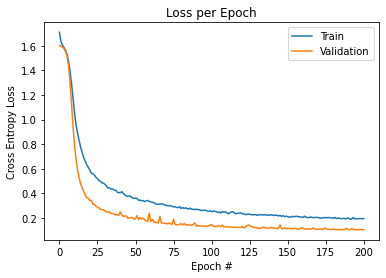

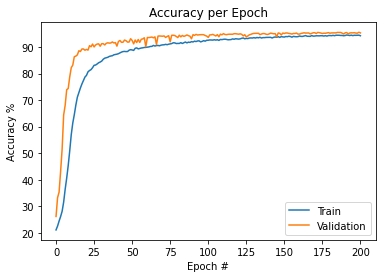

The final accuracies and losses are:
Train_Accuracy: 94.276%
Train_Loss: 0.196
Val_Accuracy: 95.332%
Val_Loss: 0.104
Test_Accuracy: 95.215%
Test_Loss 0.096


In [ ]:
# CNN
model = network(num_conv = 5, d = 0.5)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 16, Name = Moment1** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0.9

Epoch: 0/200.............  Train_Loss: 0.778 Train_Accuracy: 0.744 Val_Loss: 0.210 Val_Accuracy: 0.916
Epoch: 1/200.............  Train_Loss: 0.179 Train_Accuracy: 0.942 Val_Loss: 0.137 Val_Accuracy: 0.939
Epoch: 2/200.............  Train_Loss: 0.127 Train_Accuracy: 0.958 Val_Loss: 0.118 Val_Accuracy: 0.946
Epoch: 3/200.............  Train_Loss: 0.109 Train_Accuracy: 0.964 Val_Loss: 0.096 Val_Accuracy: 0.954
Epoch: 4/200.............  Train_Loss: 0.092 Train_Accuracy: 0.969 Val_Loss: 0.090 Val_Accuracy: 0.955
Epoch: 5/200.............  Train_Loss: 0.085 Train_Accuracy: 0.971 Val_Loss: 0.085 Val_Accuracy: 0.957
Epoch: 6/200.............  Train_Loss: 0.082 Train_Accuracy: 0.972 Val_Loss: 0.094 Val_Accuracy: 0.956
Epoch: 7/200.............  Train_Loss: 0.075 Train_Accuracy: 0.974 Val_Loss: 0.073 Val_Accuracy: 0.961
Epoch: 8/200.............  Train_Loss: 0.071 Train_Accuracy: 0.975 Val_Loss: 0.070 Val_Accuracy: 0.962
Epoch: 9/200.............  Train_Loss: 0.065 Train_Accuracy: 0.976 Val_Lo

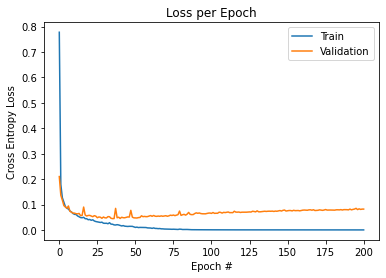

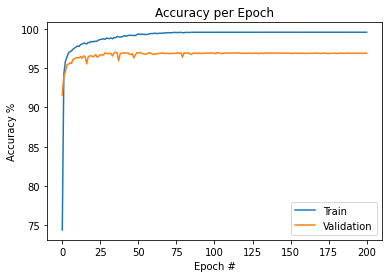

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 96.895%
Val_Loss: 0.082
Test_Accuracy: 96.348%
Test_Loss 0.081


In [ ]:
# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 17, Name = Moment2** 

*Parameters:*

* Number of convolutional layers = 5
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0.95

Epoch: 0/200.............  Train_Loss: 0.802 Train_Accuracy: 0.735 Val_Loss: 0.225 Val_Accuracy: 0.923
Epoch: 1/200.............  Train_Loss: 0.150 Train_Accuracy: 0.951 Val_Loss: 0.108 Val_Accuracy: 0.949
Epoch: 2/200.............  Train_Loss: 0.105 Train_Accuracy: 0.966 Val_Loss: 0.092 Val_Accuracy: 0.955
Epoch: 3/200.............  Train_Loss: 0.079 Train_Accuracy: 0.974 Val_Loss: 0.090 Val_Accuracy: 0.958
Epoch: 4/200.............  Train_Loss: 0.073 Train_Accuracy: 0.975 Val_Loss: 0.077 Val_Accuracy: 0.959
Epoch: 5/200.............  Train_Loss: 0.070 Train_Accuracy: 0.975 Val_Loss: 0.082 Val_Accuracy: 0.959
Epoch: 6/200.............  Train_Loss: 0.062 Train_Accuracy: 0.977 Val_Loss: 0.072 Val_Accuracy: 0.961
Epoch: 7/200.............  Train_Loss: 0.054 Train_Accuracy: 0.980 Val_Loss: 0.065 Val_Accuracy: 0.965
Epoch: 8/200.............  Train_Loss: 0.053 Train_Accuracy: 0.980 Val_Loss: 0.059 Val_Accuracy: 0.964
Epoch: 9/200.............  Train_Loss: 0.047 Train_Accuracy: 0.982 Val_Lo

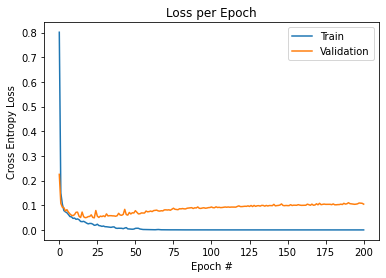

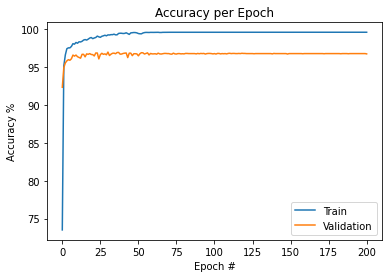

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 96.699%
Val_Loss: 0.105
Test_Accuracy: 96.387%
Test_Loss 0.090


In [ ]:
# CNN
model = network(num_conv = 5, d = 0)
model.to(device)

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.95)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 18, Name = Intuition1** 

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0
* Momentum = 0.9

Epoch: 0/200.............  Train_Loss: 1.270 Train_Accuracy: 0.875 Val_Loss: 0.092 Val_Accuracy: 0.954
Epoch: 1/200.............  Train_Loss: 0.085 Train_Accuracy: 0.972 Val_Loss: 0.081 Val_Accuracy: 0.959
Epoch: 2/200.............  Train_Loss: 0.070 Train_Accuracy: 0.976 Val_Loss: 0.073 Val_Accuracy: 0.961
Epoch: 3/200.............  Train_Loss: 0.060 Train_Accuracy: 0.979 Val_Loss: 0.067 Val_Accuracy: 0.963
Epoch: 4/200.............  Train_Loss: 0.053 Train_Accuracy: 0.981 Val_Loss: 0.062 Val_Accuracy: 0.963
Epoch: 5/200.............  Train_Loss: 0.047 Train_Accuracy: 0.982 Val_Loss: 0.061 Val_Accuracy: 0.964
Epoch: 6/200.............  Train_Loss: 0.044 Train_Accuracy: 0.983 Val_Loss: 0.056 Val_Accuracy: 0.964
Epoch: 7/200.............  Train_Loss: 0.039 Train_Accuracy: 0.985 Val_Loss: 0.057 Val_Accuracy: 0.966
Epoch: 8/200.............  Train_Loss: 0.036 Train_Accuracy: 0.985 Val_Loss: 0.057 Val_Accuracy: 0.967
Epoch: 9/200.............  Train_Loss: 0.034 Train_Accuracy: 0.985 Val_Lo

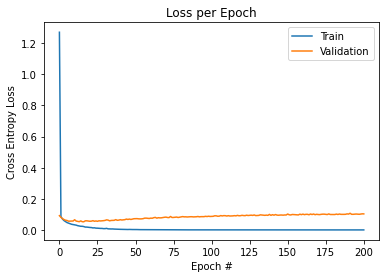

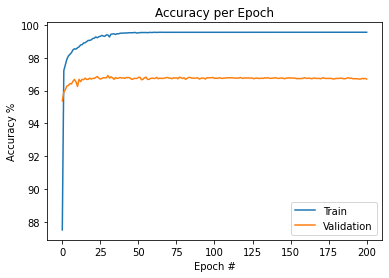

The final accuracies and losses are:
Train_Accuracy: 99.550%
Train_Loss: 0.000
Val_Accuracy: 96.699%
Val_Loss: 0.103
Test_Accuracy: 96.445%
Test_Loss 0.088


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 19, Name = Intuition2** 

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.0001
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 0.788 Train_Accuracy: 0.879 Val_Loss: 0.138 Val_Accuracy: 0.943
Epoch: 1/200.............  Train_Loss: 0.117 Train_Accuracy: 0.964 Val_Loss: 0.104 Val_Accuracy: 0.952
Epoch: 2/200.............  Train_Loss: 0.096 Train_Accuracy: 0.969 Val_Loss: 0.096 Val_Accuracy: 0.954
Epoch: 3/200.............  Train_Loss: 0.086 Train_Accuracy: 0.972 Val_Loss: 0.088 Val_Accuracy: 0.955
Epoch: 4/200.............  Train_Loss: 0.079 Train_Accuracy: 0.974 Val_Loss: 0.089 Val_Accuracy: 0.955
Epoch: 5/200.............  Train_Loss: 0.075 Train_Accuracy: 0.975 Val_Loss: 0.083 Val_Accuracy: 0.957
Epoch: 6/200.............  Train_Loss: 0.070 Train_Accuracy: 0.976 Val_Loss: 0.078 Val_Accuracy: 0.957
Epoch: 7/200.............  Train_Loss: 0.067 Train_Accuracy: 0.977 Val_Loss: 0.077 Val_Accuracy: 0.959
Epoch: 8/200.............  Train_Loss: 0.064 Train_Accuracy: 0.978 Val_Loss: 0.076 Val_Accuracy: 0.958
Epoch: 9/200.............  Train_Loss: 0.062 Train_Accuracy: 0.978 Val_Lo

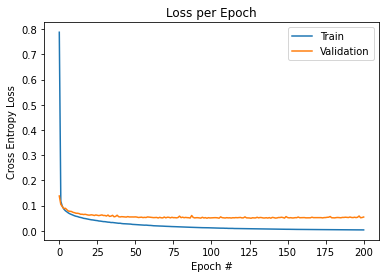

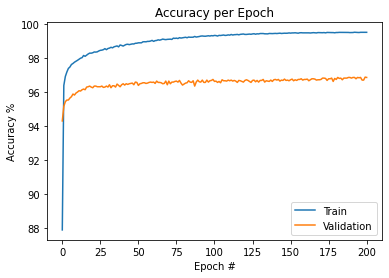

The final accuracies and losses are:
Train_Accuracy: 99.530%
Train_Loss: 0.003
Val_Accuracy: 96.875%
Val_Loss: 0.054
Test_Accuracy: 96.309%
Test_Loss 0.048


In [ ]:
# CNN
model = network(num_conv = 2, d = 0)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.0001)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 20, Name = Intuition3** 

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0.25
* Optimiser = SGD
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.0001
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 0.597 Train_Accuracy: 0.853 Val_Loss: 0.147 Val_Accuracy: 0.939
Epoch: 1/200.............  Train_Loss: 0.160 Train_Accuracy: 0.949 Val_Loss: 0.117 Val_Accuracy: 0.946
Epoch: 2/200.............  Train_Loss: 0.128 Train_Accuracy: 0.960 Val_Loss: 0.100 Val_Accuracy: 0.952
Epoch: 3/200.............  Train_Loss: 0.114 Train_Accuracy: 0.964 Val_Loss: 0.099 Val_Accuracy: 0.952
Epoch: 4/200.............  Train_Loss: 0.104 Train_Accuracy: 0.967 Val_Loss: 0.093 Val_Accuracy: 0.954
Epoch: 5/200.............  Train_Loss: 0.099 Train_Accuracy: 0.968 Val_Loss: 0.092 Val_Accuracy: 0.955
Epoch: 6/200.............  Train_Loss: 0.098 Train_Accuracy: 0.969 Val_Loss: 0.087 Val_Accuracy: 0.954
Epoch: 7/200.............  Train_Loss: 0.092 Train_Accuracy: 0.969 Val_Loss: 0.082 Val_Accuracy: 0.956
Epoch: 8/200.............  Train_Loss: 0.087 Train_Accuracy: 0.972 Val_Loss: 0.081 Val_Accuracy: 0.958
Epoch: 9/200.............  Train_Loss: 0.086 Train_Accuracy: 0.971 Val_Lo

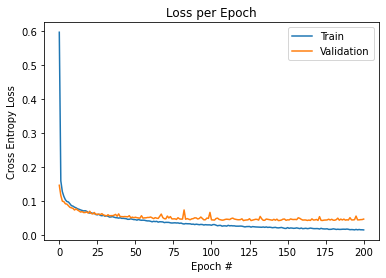

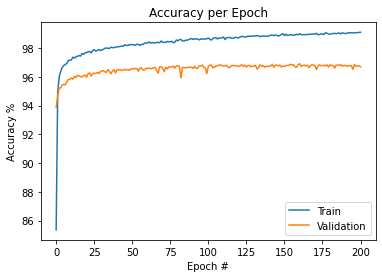

The final accuracies and losses are:
Train_Accuracy: 99.103%
Train_Loss: 0.016
Val_Accuracy: 96.699%
Val_Loss: 0.048
Test_Accuracy: 96.406%
Test_Loss 0.042


In [ ]:
# CNN
model = network(num_conv = 2, d = 0.25)
model.to(device)

# optimizer
optimizer = optim(version = 'SGD', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.0001)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))


**Iteration 21, Name = Intuition4** 

*Parameters:*

* Number of convolutional layers = 2
* Dropout = 0.25
* Optimiser = Adam
* Learning rate = 0.001
* Number of epochs = 200
* L2 regularisation lambda = 0.0001
* Momentum = 0

Epoch: 0/200.............  Train_Loss: 0.539 Train_Accuracy: 0.897 Val_Loss: 0.093 Val_Accuracy: 0.956
Epoch: 1/200.............  Train_Loss: 0.085 Train_Accuracy: 0.972 Val_Loss: 0.072 Val_Accuracy: 0.962
Epoch: 2/200.............  Train_Loss: 0.066 Train_Accuracy: 0.977 Val_Loss: 0.064 Val_Accuracy: 0.965
Epoch: 3/200.............  Train_Loss: 0.053 Train_Accuracy: 0.980 Val_Loss: 0.066 Val_Accuracy: 0.964
Epoch: 4/200.............  Train_Loss: 0.047 Train_Accuracy: 0.982 Val_Loss: 0.056 Val_Accuracy: 0.965
Epoch: 5/200.............  Train_Loss: 0.042 Train_Accuracy: 0.983 Val_Loss: 0.047 Val_Accuracy: 0.970
Epoch: 6/200.............  Train_Loss: 0.037 Train_Accuracy: 0.984 Val_Loss: 0.048 Val_Accuracy: 0.970
Epoch: 7/200.............  Train_Loss: 0.031 Train_Accuracy: 0.986 Val_Loss: 0.049 Val_Accuracy: 0.969
Epoch: 8/200.............  Train_Loss: 0.030 Train_Accuracy: 0.986 Val_Loss: 0.049 Val_Accuracy: 0.968
Epoch: 9/200.............  Train_Loss: 0.025 Train_Accuracy: 0.987 Val_Lo

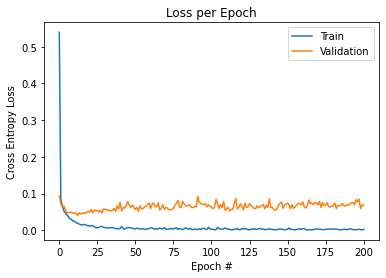

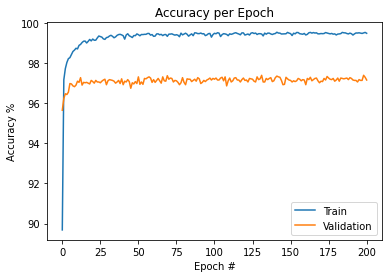

The final accuracies and losses are:
Train_Accuracy: 99.474%
Train_Loss: 0.003
Val_Accuracy: 97.148%
Val_Loss: 0.069
Test_Accuracy: 96.387%
Test_Loss 0.079


In [ ]:
# CNN
model = network(num_conv = 2, d = 0.25)
model.to(device)

# optimizer
optimizer = optim(version = 'Adam', learning_rate = 0.001)

# training
train_l, train_acc, valid_l, valid_acc, epoch_num = train_valid(num_epoch = 200, lam = 0.0001)

# plot loss and accuracy per epoch on training and validation set
plot_loss()
plot_accuracy()

# testing
test_loss, test_accuracy = test()

# print final training, validation and test accuracies 
print("The final accuracies and losses are:")
print("Train_Accuracy: {:.3f}%".format(train_acc[-1]))
print("Train_Loss: {:.3f}".format(train_l[-1]))
print("Val_Accuracy: {:.3f}%".format(valid_acc[-1]))
print("Val_Loss: {:.3f}".format(valid_l[-1]))
print("Test_Accuracy: {:.3f}%".format(test_accuracy/len(fm1_testloader)*100))
print("Test_Loss {:.3f}".format(test_loss/len(fm1_testloader)))

# 3.3 Feature map inspection

In [ ]:
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./train-images-idx3-ubyte.gz # ! linux comand line
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./train-labels-idx1-ubyte.gz # curl is to grab someting from the internet 
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./t10k-images-idx3-ubyte.gz
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./t10k-labels-idx1-ubyte.gz

In [ ]:
!gzip -d train-labels-idx1-ubyte.gz # uncompress with gzip
!gzip -d train-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz

gzip: train-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-labels-idx1-ubyte already exists; do you wish to overwrite (y or n)? y
gzip: t10k-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y


In [ ]:

!pip install idx2numpy


  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=0b5cbcb2ed083702626ce926942d29cdb59aac8150b7973954cf0896a5157774
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
import idx2numpy
import numpy as np

In [ ]:
vanillaxs = idx2numpy.convert_from_file('./train-images-idx3-ubyte') # saved the numpy variable to a file
vanillays = idx2numpy.convert_from_file('./train-labels-idx1-ubyte')


fmtrainxs = vanillaxs[0: 50000, :, :]
fmtrainys = vanillays[0: 50000]
fmvalidxs = vanillaxs[50000:, :, :]
fmvalidys = vanillays[50000:]

fmtestxs = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte')
fmtestys = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte')

print(vanillaxs.shape)
print(vanillays.shape)

print(fmtrainxs.shape)
print(fmtrainys.shape)

print(fmvalidxs.shape)
print(fmvalidys.shape)

print(fmtestxs.shape)
print(fmtestys.shape)


(60000, 28, 28)
(60000,)
(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [ ]:
!pip install idx2numpy

print("Whole data shape")
print(vanillaxs.shape)
print(vanillays.shape)
print()

print("Train data shape")
print(fmtrainxs.shape)
print(fmtrainys.shape)
print()

print("Validation data shape")
print(fmvalidxs.shape)
print(fmvalidys.shape)
print()

print("Test data shape")
print(fmtestxs.shape)
print(fmtestys.shape)
print()

Whole data shape
(60000, 28, 28)
(60000,)

Train data shape
(50000, 28, 28)
(50000,)

Validation data shape
(10000, 28, 28)
(10000,)

Test data shape
(10000, 28, 28)
(10000,)



In [ ]:
def filter(xs, ys, lbls):
  idxs = [i for (i, y) in enumerate(ys) if y in lbls] #labels from the original dataset 
  xsprime = np.zeros((len(idxs), xs.shape[1],xs.shape[2]))

  for (i, j) in enumerate(idxs):
    xsprime[i, :, :] = xs[j, :, :]

  ymap = dict([(y, yprime) for (yprime, y) in enumerate(lbls)])
  ysprime = [ymap[y] for y in ys[idxs]] #0,1,4,5,8 to 0,1,2,3,4

  return np.array(xsprime), np.array(ysprime) # gets us a 3 tensor and this is a 1-tensor 


fm1lbls = [0, 1, 4, 5, 8]
fm1trainxs, fm1trainys = filter(fmtrainxs, fmtrainys, fm1lbls)
fm1validxs, fm1validys = filter(fmvalidxs, fmvalidys, fm1lbls)
fm1testxs, fm1testys = filter(fmtestxs, fmtestys, fm1lbls)


print("fm1 train shape")
print(fm1trainxs.shape)
print(fm1trainys.shape)
print()

print("fm1 valid shape")
print(fm1validxs.shape)
print(fm1validys.shape)
print()

print("fm1 test shape")
print(fm1testxs.shape)
print(fm1testys.shape)
print()

fm1 train shape
(24975, 28, 28)
(24975,)

fm1 valid shape
(5025, 28, 28)
(5025,)

fm1 test shape
(5000, 28, 28)
(5000,)



In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU IS AVAILABLE :D') 
else:  
    device = torch.device("cpu") 
    print('GPU not available')

GPU IS AVAILABLE :D


In [ ]:
fm1trainys.shape

(24975,)

In [ ]:
fm1_trainx_tensor = torch.tensor(fm1trainxs, dtype = torch.float).view(-1,1,28,28).to(device)
fm1_trainy_tensor = torch.tensor(fm1trainys).to(device)
fm1_valx_tensor = torch.tensor(fm1validxs , dtype = torch.float).view(-1,1,28,28).to(device)
fm1_valy_tensor = torch.tensor(fm1validys).to(device)
fm1_testx_tensor = torch.tensor(fm1testxs , dtype = torch.float).view(-1,1,28,28).to(device)
fm1_testy_tensor = torch.tensor(fm1testys).to(device)

In [ ]:
print(fm1_trainx_tensor.shape) # correct shapes 
print(fm1_valx_tensor.shape)
print(fm1_testx_tensor.shape)

torch.Size([24975, 1, 28, 28])
torch.Size([5025, 1, 28, 28])
torch.Size([5000, 1, 28, 28])


In [ ]:
BATCH_SIZE = 256 # initialize batch size

fm1_trainset = torch.utils.data.TensorDataset(fm1_trainx_tensor, fm1_trainy_tensor) # Handles the batchng of the data
fm1_valset = torch.utils.data.TensorDataset(fm1_valx_tensor, fm1_valy_tensor)
fm1_testset = torch.utils.data.TensorDataset(fm1_testx_tensor, fm1_testy_tensor)
# data set organises the data in one veriable per pair of data sets for x and y
fm1_trainloader = torch.utils.data.DataLoader(fm1_trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
fm1_valloader = torch.utils.data.DataLoader(fm1_valset, batch_size= BATCH_SIZE, shuffle=True, num_workers=0)
fm1_testloader = torch.utils.data.DataLoader(fm1_testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0) # num_workers =0 it means CPU is used for datloading not GPU, but 2 in CPU mode then you can use 2 processes
# organises the variable data saved in terms of batches when loading 





In [ ]:
# class CNN(nn.Module):
#   def __init__(self):
#     super(CNN, self).__init__() # without padding kernal dedcates 1 from each dimension of width and height 
#     self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = (1,1))  # we specift ( input_channels, out_channels )
#     self.conv2 = nn.Conv2d(10,20, kernel_size = 3, padding = (1,1))# Padding adds a dimension on the left and right 
#     self.conv2_drop = nn.Dropout2d(0.5) # 50% of pixels left
#     self.pool = nn.MaxPool2d(2,2) # 2x2 matrix with a stride 2
#     self.fc1 = nn.Linear(20*7*7,100) # fully connected layers # 28 /2 =  14 . 14/2 = 7
#     self.fc2 = nn.Linear(100,5)
# # Padding allows us to not throw away the egdes.
#  #   self.conv2_drop = nn.Dropout2d(0.2) # random filters being dropped
#   def forward(self, x):
#     x = F.relu(self.conv1(x))
#     x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
#     x = self.dropout(x) # for drop out in 2nd layer construtor add drop out just after the pooling function. 
#     x = F.relu(self.conv2(x))
#     x = self.pool(x)
#     x = x.view(-1, 20 * 7* 7) # flatten tensor
#     x = F.relu(self.fc1(x))
#   #  x = self.dropout(x)
#     x = self.fc2(x)

#     return x

#   def featuremaps(self,x):
#     x = F.relu(self.conv1(x))
#     Featuremaps1 = x

#     x = self.pool(x)
#     x = F.relu(self.conv2(x))
#     FeatureMaps2 = x
#     #x = self.pool(x)
#     #x = F.relu(self.conv3(x))
#     #FeatureMaps3 = x

  

#    return Featuremaps1, FeatureMaps2


In [ ]:
class CNN_3(nn.Module):
  def __init__(self):
    super(CNN_3, self).__init__() # without padding kernel dedicates 1 from each dimension of width and height 
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 3, padding = (1,1))  # we specify (input_channels, out_channels)
    self.conv2 = nn.Conv2d(10,50, kernel_size = 3, padding = (1,1)) # Padding adds a dimension on the left and right 
    self.conv3 = nn.Conv2d(50,20, kernel_size = 3, padding = (1,1))
    self.dropout = nn.Dropout2d(0.5) 
    self.pool = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(20*3*3,50) 
    self.fc2 = nn.Linear(50,5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) # apply filter convolution to input followed by relu activation followed by pooling
    x = self.dropout(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.dropout(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x)
    x = x.view(-1, 20 * 3* 3) # flatten tensor
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

  def featuremaps(self,x):
    x = F.relu(self.conv1(x))
    Featuremaps1 = x

    x = self.pool(x)
    x = F.relu(self.conv2(x))
    Featuremaps2 = x

    x = self.pool(x)
    x = F.relu(self.conv3(x))
    Featuremaps3 = x # feature maps is always after the activation function in a convolutional Neural Network.

    return Featuremaps1, Featuremaps2, Featuremaps3

    

In [ ]:

learning_rate = 0.0001
num_epoch = 200
model = CNN_3() # calling my instance of CNN class
model.to(device)
criterion = nn.CrossEntropyLoss()
optim_a = torch.optim.Adam(model.parameters(), lr = learning_rate)  # Adam is optimization algorithem 

In [ ]:
## function to train the model and validate it ## 

def train_valid(num_epoch = 200):

  #optimizer = optim()  # calling specified optimiser
  optimizer = optim_a 
  #initialize empty lists to store values for plots
  epoch_num = [] 
  train_l = []
  train_acc = []
  valid_l = []
  valid_acc = []


  # Training Run. hidden - just hidden states into the next
  for epoch in range(num_epoch+1):
    
    # training
    model.train()
    train_loss = 0
    train_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_trainloader):
      
      optimizer.zero_grad() # clears the gradient from the
      output = model(xs) # so coming in of length

      loss = criterion(output , ys.long()) # loss without regulariser (as specified in question)
      loss.backward() 
      optimizer.step() # updating the weights in steps
      train_loss = train_loss + loss.item() # stores loss (without regulariser)
      #batch accuracy calculated with only the last element
      train_accuracy = train_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1) ==ys).item()/BATCH_SIZE # batch accuracy #.view(-1, 5   ,  1 )[:,-1,:],1).indices

    # update initialized lists    
    train_l.append(train_loss/len(fm1_trainloader)) 
    train_acc.append(train_accuracy/len(fm1_trainloader)*100)


    # validation

    model.eval ()
    valid_loss = 0
    valid_accuracy = 0

    for batch , (xs , ys) in enumerate(fm1_valloader):
      output = model(xs) # so coming in of length
      loss = criterion(output , ys.long())
      #log data
      #aggregate batch performance
      valid_loss = valid_loss + loss.item()
      valid_accuracy = valid_accuracy + torch.sum(torch.argmax(output,dim=output.ndim-1)==ys).item()/BATCH_SIZE  # we use full batch in

    # update initialized lists    
    epoch_num.append(epoch)
    valid_l.append(valid_loss/len(fm1_valloader))
    valid_acc.append(valid_accuracy/len(fm1_valloader)*100)

    # print summary for each epoch
    print("Epoch: {}/{}............. ".format(epoch , num_epoch), end= ' ')
    print("Train_Loss: {:.3f}".format(train_loss/len(fm1_trainloader)), end= ' ')
    print("Train_Accuracy: {:.3f}".format(train_accuracy/len(fm1_trainloader)), end= ' ')
    print("Val_Loss: {:.3f}".format(valid_loss/len(fm1_valloader)), end= ' ')
    print("Val_Accuracy: {:.3f}".format(valid_accuracy/len(fm1_valloader)))
 # Place the plots outside the batches loop. Keep it in the epochs loop as all the calculation will be calculated as a plot per per epoch. 
  plt.plot(range(len(train_l)), train_l  , label = "Train") # range(len(list)) - axis is number of elenents in the list 
  plt.plot(range(len(valid_l)), valid_l , label = "Validation")
  plt.title("Loss per Epoch")
  plt.xlabel("Number of epochs")
  plt.ylabel( "Loss")
  plt.legend()
  plt.show()

  plt.plot(range(len(train_acc)), train_acc, label = "Train") # number of elements per epoch against what you actually want 
  plt.plot(range(len(valid_acc)), valid_acc, label = "Validation")
  plt.title("Accuracy per Epoch")
  plt.xlabel("Number of epoch")
  plt.ylabel("Accuracy %")
  plt.legend()
  plt.show()





Epoch: 0/200.............  Train_Loss: 1.776 Train_Accuracy: 0.402 Val_Loss: 0.693 Val_Accuracy: 0.836
Epoch: 1/200.............  Train_Loss: 0.681 Train_Accuracy: 0.739 Val_Loss: 0.316 Val_Accuracy: 0.903
Epoch: 2/200.............  Train_Loss: 0.426 Train_Accuracy: 0.855 Val_Loss: 0.225 Val_Accuracy: 0.920
Epoch: 3/200.............  Train_Loss: 0.340 Train_Accuracy: 0.887 Val_Loss: 0.189 Val_Accuracy: 0.927
Epoch: 4/200.............  Train_Loss: 0.288 Train_Accuracy: 0.905 Val_Loss: 0.167 Val_Accuracy: 0.929
Epoch: 5/200.............  Train_Loss: 0.255 Train_Accuracy: 0.916 Val_Loss: 0.147 Val_Accuracy: 0.937
Epoch: 6/200.............  Train_Loss: 0.229 Train_Accuracy: 0.925 Val_Loss: 0.138 Val_Accuracy: 0.940
Epoch: 7/200.............  Train_Loss: 0.219 Train_Accuracy: 0.927 Val_Loss: 0.125 Val_Accuracy: 0.943
Epoch: 8/200.............  Train_Loss: 0.202 Train_Accuracy: 0.933 Val_Loss: 0.124 Val_Accuracy: 0.945
Epoch: 9/200.............  Train_Loss: 0.190 Train_Accuracy: 0.937 Val_Lo

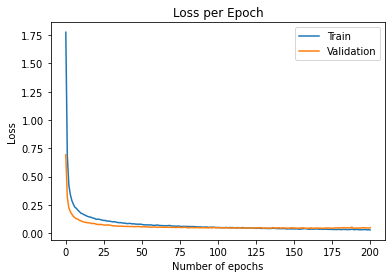

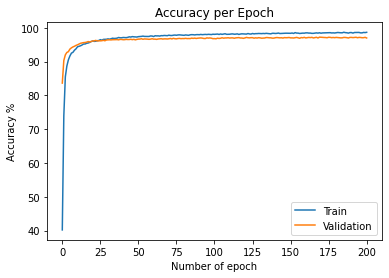

In [ ]:
train_valid(200)

In [ ]:
fm1trainxs.shape
fm1trainys.shape

(24975,)

In [ ]:
class_toget = 0; indexes_to_get = fm1trainys == class_toget # indexes to get class we want , label a variabe to a boolen.
class_images = fm1trainxs[indexes_to_get,:,:] # images fri the training data to get the classes we want 

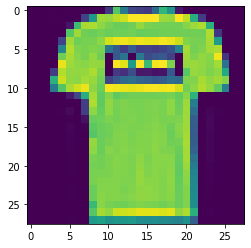

In [ ]:
plt.imshow(class_images[0,:,:])

In [ ]:
xs = torch.tensor(class_images[0,:,:].reshape(1,1,28,28), dtype = torch.float32).to('cuda') # data is a torch tensor that is reshaped per channel. Extra dimension added
feature1, feature2, feature3 = model.featuremaps(xs) # torch tensir in the model. 

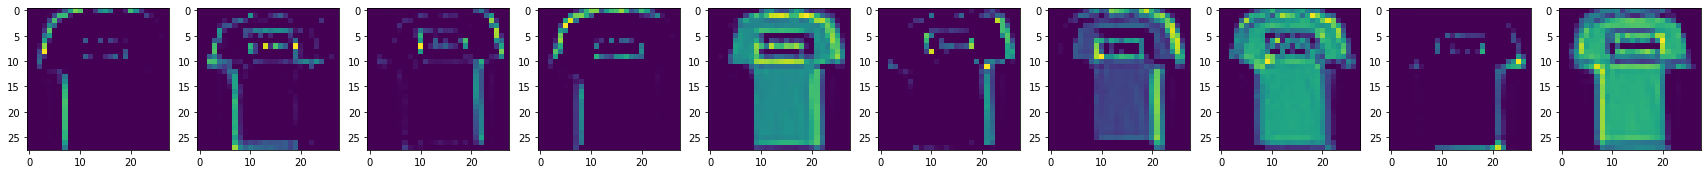

In [ ]:
nChannel = feature1.shape[1]; imw = 3
fig,ax = plt.subplots(1, nChannel, figsize = (imw*nChannel, imw))
for i in range(nChannel):
  feature_im = feature1[0,i,:,:].detach().to('cpu').numpy()
  ax[i].imshow(feature_im)

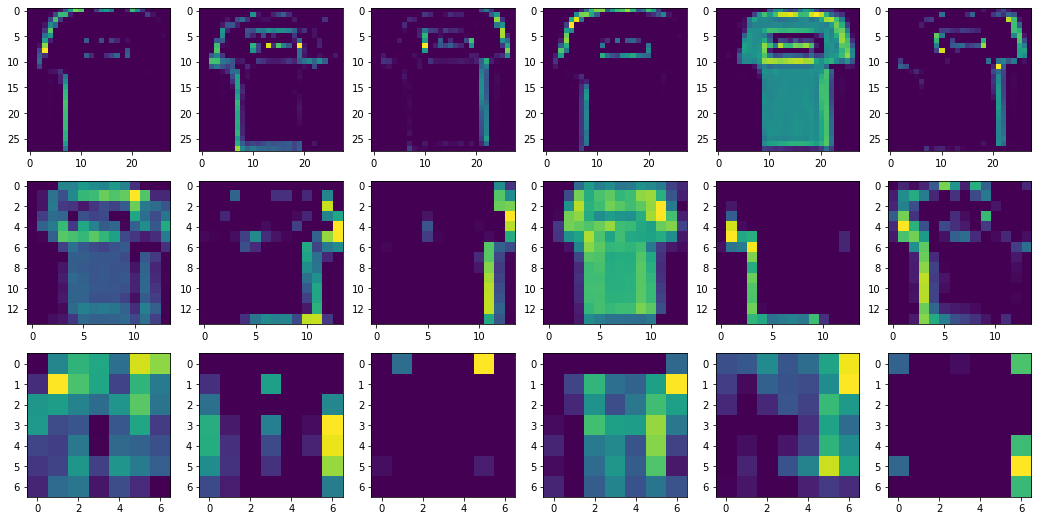

In [ ]:
imw = 3; j = 0
layer_list = [feature1, feature2, feature3]; fig,ax = plt.subplots(len(layer_list), 6, figsize = (imw * 6, len(layer_list) * imw))
for layer in layer_list:
  for i in range(6):
    feature_im = layer[0, i, :, :].detach().to('cpu').numpy()
    ax[j][i].imshow(feature_im)
  j += 1

In [ ]:
class_toget = 1; indexes_to_get = fm1trainys == class_toget # indexes to get class we want , label a variabe to a boolen.
class_images = fm1trainxs[indexes_to_get,:,:] # images fri the training data to get the classes we want 

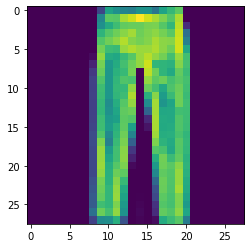

In [ ]:
plt.imshow(class_images[0,:,:])

In [ ]:
xs = torch.tensor(class_images[0,:,:].reshape(1,1,28,28), dtype = torch.float32).to('cuda') # data is a torch tensor that is reshaped per channel. Extra dimension added
feature1, feature2, feature3 = model.featuremaps(xs) # torch tensir in the model. 

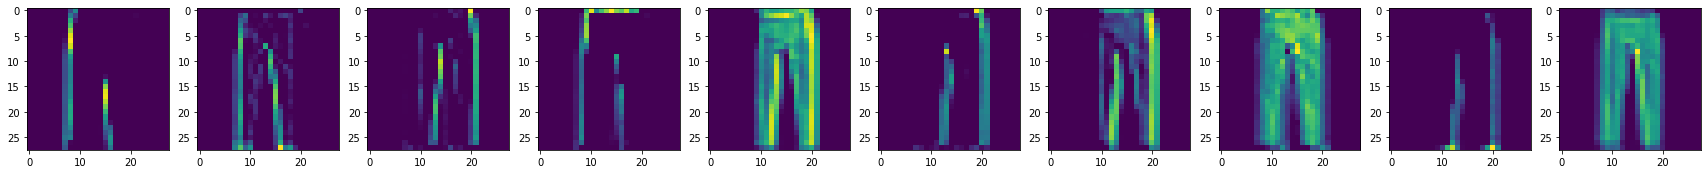

In [ ]:
nChannel = feature1.shape[1]; imw = 3
fig,ax = plt.subplots(1, nChannel, figsize = (imw*nChannel, imw))
for i in range(nChannel):
  feature_im = feature1[0,i,:,:].detach().to('cpu').numpy()
  ax[i].imshow(feature_im)

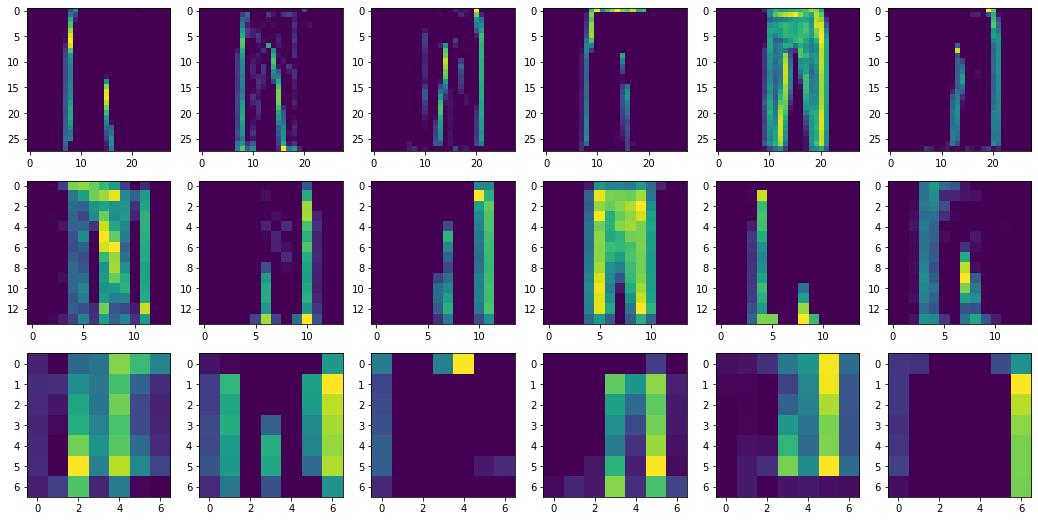

In [ ]:
imw = 3; j = 0
layer_list = [feature1, feature2, feature3]; fig,ax = plt.subplots(len(layer_list), 6, figsize = (imw * 6, len(layer_list) * imw))
for layer in layer_list:
  for i in range(6):
    feature_im = layer[0, i, :, :].detach().to('cpu').numpy()
    ax[j][i].imshow(feature_im)
  j += 1

In [ ]:
class_toget = 2; indexes_to_get = fm1trainys == class_toget # indexes to get class we want , label a variabe to a boolen.
class_images = fm1trainxs[indexes_to_get,:,:] # images fri the training data to get the classes we want 

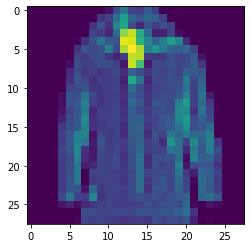

In [ ]:
plt.imshow(class_images[0,:,:])

In [ ]:
xs = torch.tensor(class_images[0,:,:].reshape(1,1,28,28), dtype = torch.float32).to('cuda') # data is a torch tensor that is reshaped per channel. Extra dimension added
feature1, feature2, feature3 = model.featuremaps(xs) # torch tensir in the model. 

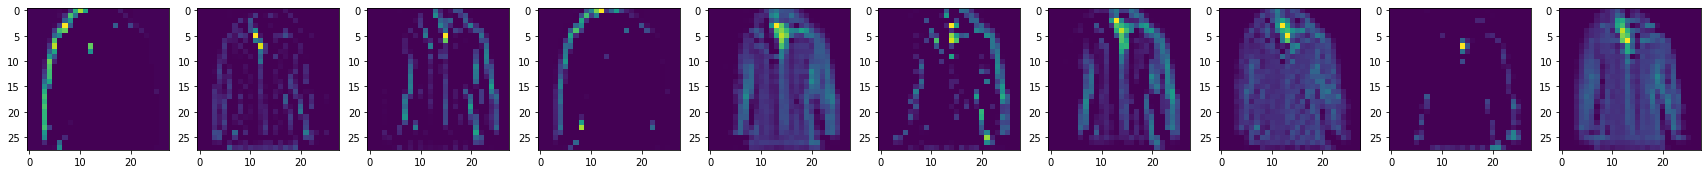

In [ ]:
nChannel = feature1.shape[1]; imw = 3
fig,ax = plt.subplots(1, nChannel, figsize = (imw*nChannel, imw))
for i in range(nChannel):
  feature_im = feature1[0,i,:,:].detach().to('cpu').numpy()
  ax[i].imshow(feature_im)

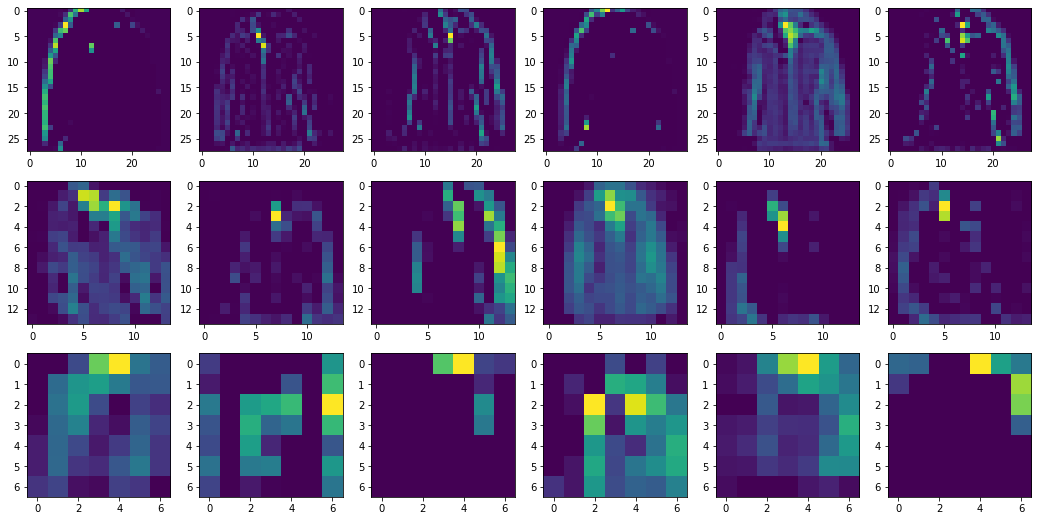

In [ ]:
imw = 3; j = 0
layer_list = [feature1, feature2, feature3]; fig,ax = plt.subplots(len(layer_list), 6, figsize = (imw * 6, len(layer_list) * imw))
for layer in layer_list:
  for i in range(6):
    feature_im = layer[0, i, :, :].detach().to('cpu').numpy()
    ax[j][i].imshow(feature_im)
  j += 1

In [ ]:
class_toget = 3; indexes_to_get = fm1trainys == class_toget # indexes to get class we want , label a variabe to a boolen.
class_images = fm1trainxs[indexes_to_get,:,:] # images fri the training data to get the classes we want 

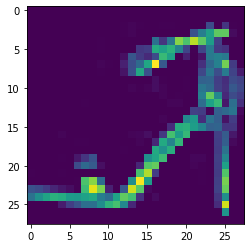

In [ ]:
plt.imshow(class_images[0,:,:])

In [ ]:
xs = torch.tensor(class_images[0,:,:].reshape(1,1,28,28), dtype = torch.float32).to('cuda') # data is a torch tensor that is reshaped per channel. Extra dimension added
feature1, feature2, feature3 = model.featuremaps(xs) # torch tensir in the model. 

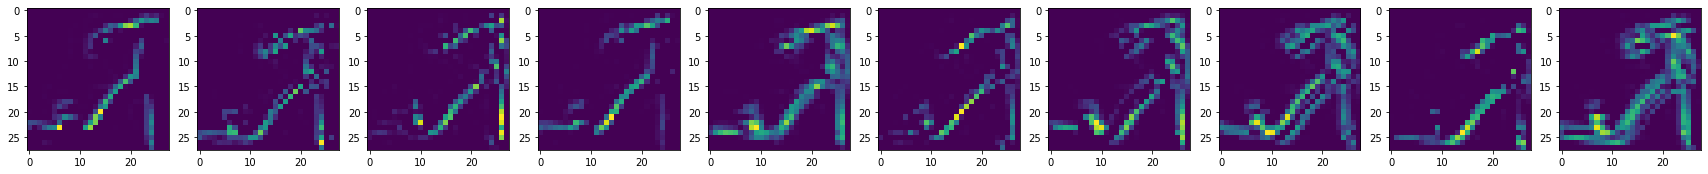

In [ ]:
nChannel = feature1.shape[1]; imw = 3
fig,ax = plt.subplots(1, nChannel, figsize = (imw*nChannel, imw))
for i in range(nChannel):
  feature_im = feature1[0,i,:,:].detach().to('cpu').numpy()
  ax[i].imshow(feature_im)

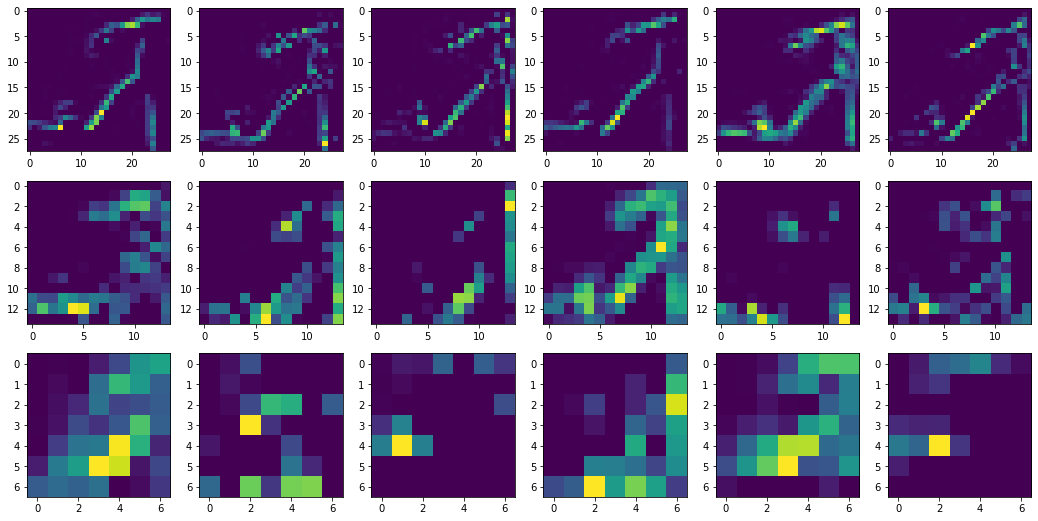

In [ ]:
imw = 3; j = 0
layer_list = [feature1, feature2, feature3]; fig,ax = plt.subplots(len(layer_list), 6, figsize = (imw * 6, len(layer_list) * imw))
for layer in layer_list:
  for i in range(6):
    feature_im = layer[0, i, :, :].detach().to('cpu').numpy()
    ax[j][i].imshow(feature_im)
  j += 1

In [ ]:
class_toget = 4; indexes_to_get = fm1trainys == class_toget # indexes to get class we want , label a variabe to a boolen.
class_images = fm1trainxs[indexes_to_get,:,:] # images fri the training data to get the classes we want 

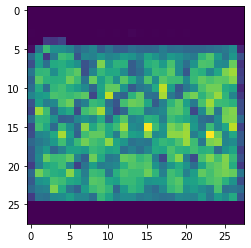

In [ ]:
plt.imshow(class_images[0,:,:])

In [ ]:
xs = torch.tensor(class_images[0,:,:].reshape(1,1,28,28), dtype = torch.float32).to('cuda') # data is a torch tensor that is reshaped per channel. Extra dimension added
feature1, feature2, feature3 = model.featuremaps(xs) # torch tensir in the model. 

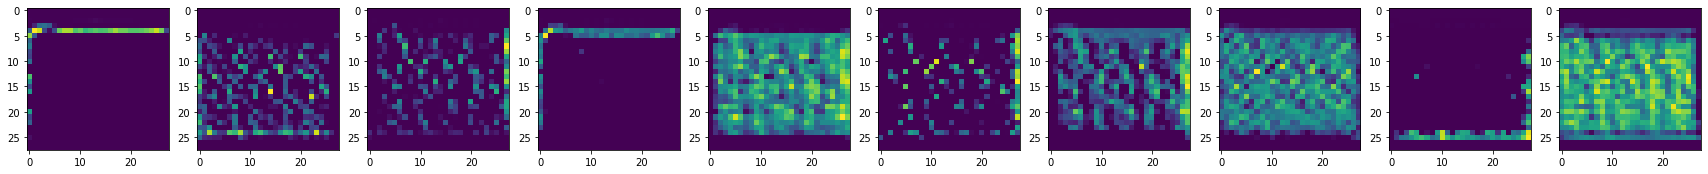

In [ ]:
nChannel = feature1.shape[1]; imw = 3
fig,ax = plt.subplots(1, nChannel, figsize = (imw*nChannel, imw))
for i in range(nChannel):
  feature_im = feature1[0,i,:,:].detach().to('cpu').numpy()
  ax[i].imshow(feature_im)

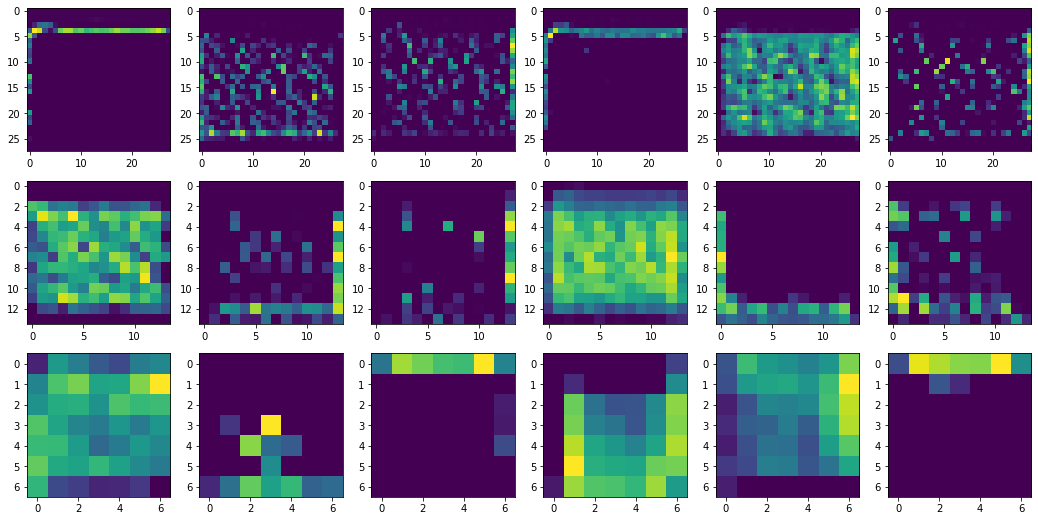

In [ ]:
imw = 3; j = 0
layer_list = [feature1, feature2, feature3]; fig,ax = plt.subplots(len(layer_list), 6, figsize = (imw * 6, len(layer_list) * imw))
for layer in layer_list:
  for i in range(6):
    feature_im = layer[0, i, :, :].detach().to('cpu').numpy()
    ax[j][i].imshow(feature_im)
  j += 1

# 3.4 Pre-training

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

!pip install idx2numpy
import idx2numpy

In [ ]:
# importing the training images and splitting it into a training and validation set
train_data = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y_train_data = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
x_train = train_data[:50000,:]
y_train = y_train_data[:50000]

x_val = train_data[50000:,:]
y_val = y_train_data[50000:]

x_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

In [ ]:
def filter(xs, ys, lbls):
    idxs = []
    for (i,y) in enumerate(ys):
        if y in lbls:
            idxs.append([i])
    xsprime = np.zeros((len(idxs), xs.shape[1], xs.shape[2]))
    for (i, j) in enumerate(idxs):
        xsprime[i, :, :] = xs[j, :, :]
    ysprime = np.zeros(len(idxs))
    for (i, j) in enumerate(idxs):
        ysprime[i] = ys[j]
    return xsprime, ysprime

fm1lbls                = [0, 1, 4, 5, 8]
fm1trainxs, fm1trainys = filter(x_train, y_train, fm1lbls)
fm1validxs, fm1validys = filter(x_val, y_val, fm1lbls)
fm1testxs, fm1testys   = filter(x_test, y_test, fm1lbls)

fm2lbls                = [2, 3, 6, 7, 9]
fm2trainxs, fm2trainys = filter(x_train, y_train, fm2lbls)
fm2validxs, fm2validys = filter(x_val, y_val, fm2lbls)
fm2testxs, fm2testys   = filter(x_test, y_test, fm2lbls)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU IS AVAILABLE :D') 
else:  
    device = torch.device("cpu") 
    print('GPU not available')

In [ ]:
fm1_trainx_tensor = torch.tensor(fm1trainxs, dtype=torch.float).to(device)
fm1_trainy_tensor = torch.tensor(fm1trainys, dtype=torch.float).to(device)
fm1_valx_tensor = torch.tensor(fm1validxs, dtype=torch.float).to(device)
fm1_valy_tensor = torch.tensor(fm1validys, dtype=torch.float).to(device)
fm1_testx_tensor = torch.tensor(fm1testxs, dtype=torch.float).to(device)
fm1_testy_tensor = torch.tensor(fm1testys, dtype=torch.float).to(device)

fm2_trainx_tensor = torch.tensor(fm2trainxs, dtype=torch.float).to(device)
fm2_trainy_tensor = torch.tensor(fm2trainys, dtype=torch.float).to(device)
fm2_valx_tensor = torch.tensor(fm2validxs, dtype=torch.float).to(device)
fm2_valy_tensor = torch.tensor(fm2validys, dtype=torch.float).to(device)
fm2_testx_tensor = torch.tensor(fm2testxs, dtype=torch.float).to(device)
fm2_testy_tensor = torch.tensor(fm2testys, dtype=torch.float).to(device)

In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 128 #1024

In [ ]:
fm1_trainset = torch.utils.data.TensorDataset(fm1_trainx_tensor, fm1_trainy_tensor)
fm1_valset = torch.utils.data.TensorDataset(fm1_valx_tensor, fm1_valy_tensor)
fm1_testset = torch.utils.data.TensorDataset(fm1_testx_tensor, fm1_testy_tensor)

fm2_trainset = torch.utils.data.TensorDataset(fm2_trainx_tensor, fm2_trainy_tensor)
fm2_valset = torch.utils.data.TensorDataset(fm2_valx_tensor, fm2_valy_tensor)
fm2_testset = torch.utils.data.TensorDataset(fm2_testx_tensor, fm2_testy_tensor)


fm1_trainloader = torch.utils.data.DataLoader(fm1_trainset, batch_size=BATCH_SIZE, shuffle=True)
fm1_valloader = torch.utils.data.DataLoader(fm1_valset, batch_size=BATCH_SIZE, shuffle=True)
fm1_testloader = torch.utils.data.DataLoader(fm1_testset, batch_size=BATCH_SIZE, shuffle=True)

fm2_trainloader = torch.utils.data.DataLoader(fm2_trainset, batch_size=BATCH_SIZE, shuffle=True)
fm2_valloader = torch.utils.data.DataLoader(fm2_valset, batch_size=BATCH_SIZE, shuffle=True)
fm2_testloader = torch.utils.data.DataLoader(fm2_testset, batch_size=BATCH_SIZE, shuffle=True)

1. Implement an autoencoder with mean squared error loss for the Fashion-MNIST-1 and Fashion-MNIST-2 data.

In [ ]:
class ConvolutionalAutoEncoder(nn.Module):
  def __init__(self):
    super(ConvolutionalAutoEncoder, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)

    self.pool = nn.MaxPool2d(2)

    self.t_conv1 = nn.ConvTranspose2d(20, 10, kernel_size=5)
    self.t_conv2 = nn.ConvTranspose2d(10, 1, kernel_size=5)

    self.upsample = nn.Upsample(scale_factor=2)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)

    x = F.relu(self.conv2(x))
    x = self.pool(x)


    x = self.upsample(x)
    x = F.relu(self.t_conv1(x))

    x = self.upsample(x)
    x = F.relu(self.t_conv2(x))

    return x

In [ ]:
def training_loop_autoencoder(model, LEARNING_RATE, trainloader, valloader, testx_tensor):
  net = model().to(device)

  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

  # training the model:
  train_losses = []
  val_losses = []

  for epoch in range(EPOCHS):
    loss = 0
    for i, data in enumerate(trainloader):
      # get inputs
      images, labels = data
      images = images/255
      images = Variable(images)
      images = images.unsqueeze(1)

      # set param grads to 0
      optimizer.zero_grad()

      #forward + backward + optimize
      output = net(images)

      train_loss = criterion(output, images)

      train_loss.backward()
      optimizer.step()
      
      loss += train_loss.item()


    loss = loss/(len(trainloader))
    train_losses.append(loss)

    for i, data in enumerate(valloader):
      # get inputs
      images, labels = data
      images = images/255
      images = Variable(images)
      images = images.unsqueeze(1)

      output = net(images)

      val_loss = criterion(output, images)
      
      loss += val_loss.item()


    loss = loss/(len(valloader))
    val_losses.append(loss)

    if epoch%1 == 0:
      print('Epoch: %d/%d,  train loss: %.6f, val loss: %.6f'%(epoch + 1,EPOCHS, loss, val_loss))
  

  test_logits = net(testx_tensor.unsqueeze(1)/255)
  test_loss = criterion(test_logits, testx_tensor.unsqueeze(1)/255)

  return train_losses, val_losses, test_loss, net

In [ ]:
def plot_loss(train_losses, val_losses):
  plt.plot(range(len(train_losses)), train_losses, label="Train")
  plt.plot(range(len(val_losses)), val_losses, label="Validation")
  plt.title("Loss per Epoch")
  plt.xlabel("Epoch no.")
  plt.ylabel("Cross Entropy Loss")
  plt.legend()
  plt.show()

2. Train your model to convergence on the combined training, validation, and test set of Fashion-MNIST-2 and training set of Fashion-MNIST-1 using an optimisation algorithm of your choice.

In [ ]:
fm2_fm1_trainx = np.concatenate((fm2trainxs, fm2validxs, fm2testxs, fm1trainxs), axis=0)
fm2_fm1_trainy = np.concatenate((fm2trainys, fm2validys, fm2testys, fm1trainys), axis=None)

fm2_fm1_trainx_tensor = torch.tensor(fm2_fm1_trainx, dtype=torch.float).to(device)
fm2_fm1_trainy_tensor = torch.tensor(fm2_fm1_trainy, dtype=torch.float).to(device)

In [ ]:
fm2_fm1_trainset = torch.utils.data.TensorDataset(fm2_fm1_trainx_tensor, fm2_fm1_trainy_tensor)
fm2_fm1_trainloader = torch.utils.data.DataLoader(fm2_fm1_trainset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
train_losses_final, val_losses_final, test_loss_final, conv_AE_final = training_loop_autoencoder(ConvolutionalAutoEncoder, LEARNING_RATE, fm2_fm1_trainloader, 
                                                        fm1_valloader, fm1_testx_tensor)

Epoch: 1/20,  train loss: 0.008773, val loss: 0.008791
Epoch: 2/20,  train loss: 0.006883, val loss: 0.006849
Epoch: 3/20,  train loss: 0.006257, val loss: 0.006315
Epoch: 4/20,  train loss: 0.005778, val loss: 0.005771
Epoch: 5/20,  train loss: 0.005472, val loss: 0.005278
Epoch: 6/20,  train loss: 0.005272, val loss: 0.005129
Epoch: 7/20,  train loss: 0.005136, val loss: 0.004979
Epoch: 8/20,  train loss: 0.005051, val loss: 0.004575
Epoch: 9/20,  train loss: 0.005003, val loss: 0.004666
Epoch: 10/20,  train loss: 0.004783, val loss: 0.004522
Epoch: 11/20,  train loss: 0.004730, val loss: 0.004456
Epoch: 12/20,  train loss: 0.004553, val loss: 0.004159
Epoch: 13/20,  train loss: 0.004443, val loss: 0.004166
Epoch: 14/20,  train loss: 0.004472, val loss: 0.004486
Epoch: 15/20,  train loss: 0.004289, val loss: 0.004484
Epoch: 16/20,  train loss: 0.004378, val loss: 0.004226
Epoch: 17/20,  train loss: 0.004179, val loss: 0.004169
Epoch: 18/20,  train loss: 0.004172, val loss: 0.003950
E

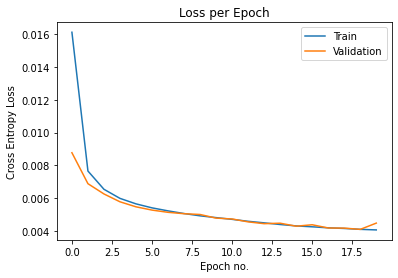

Test Loss: 0.004221


In [ ]:
plot_loss(train_losses_final, val_losses_final)
print("Test Loss: %.6f"%test_loss_final)

3. Implement a multi-class, CNN with cross-entropy loss for the Fashion- MNIST-1 data, which shares the same structure as the encoder of your autoencoder.

In [ ]:
# weights from final autoencoder
conv1_layer_weights = conv_AE_final.conv1.weight.data
conv2_layer_weights = conv_AE_final.conv2.weight.data

In [ ]:
class Equivalent_CNN(nn.Module):
  def __init__(self):
    super(Equivalent_CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv1.weight.data = conv1_layer_weights
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2.weight.data = conv2_layer_weights

    # self.drop_layer = nn.Dropout(p= 0.3)
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.max_pool2d(self.conv1(x), 2)
    x = F.relu(x)

    x = F.max_pool2d(self.conv2(x), 2)
    x = F.relu(x)

    x = x.view(-1, 320)
    
    x = F.relu(self.fc1(x))
    # x = self.drop_layer(x)
    x = self.fc2(x)
  
    return x

class Random_CNN(nn.Module):
  def __init__(self):
    super(Random_CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)

    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.max_pool2d(self.conv1(x), 2)
    x = F.relu(x)

    x = F.max_pool2d(self.conv2(x), 2)
    x = F.relu(x)

    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
  
    return x

4. Compare using random weights to those from your autoencoder to initialise the multi-layer perceptron by plotting the training and validation loss for both options when you use 5%,10%, . . . , 100% of the available Fashion-MNIST-1 training data to train your model. Is there a point where one initialisation option is superior to the other? Is one option always superior **to** the other?

In [ ]:
def splitting_xs(dataset, i): 
  ind = np.int(np.round(dataset.shape[0]/20))
  dataset_new = dataset[:(i+1)*ind, :]
  return dataset_new

def splitting_ys(dataset,i):
  ind = np.int(np.round(dataset.shape[0]/20))
  dataset_new = dataset[:(i+1)*ind]
  return dataset_new

In [ ]:
xs_splits = []
ys_splits = []

for i in range(19):
  xs_splits.append(splitting_xs(fm1_trainx_tensor, i))
  ys_splits.append(splitting_ys(fm1_trainy_tensor, i))

In [ ]:
trainset_splits = []

for i in range(20):
  trainset_splits.append(torch.utils.data.TensorDataset(xs_splits[i], ys_splits[i]))

trainloader_splits = []
for i in range(20):
  trainloader_splits.append(torch.utils.data.DataLoader(trainset_splits[i], batch_size=BATCH_SIZE, shuffle=True))

In [ ]:
# parallelizing val CUDA
def training_loop_CNN(model, trainloader, valloader, testloader):
    net = model().to(device)
    LEARNING_RATE = 0.001
    EPOCHS = 20

    # picking cost function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

    # training the model:
    train_losses = []
    val_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        running_train_loss = 0.0
        running_train_acc = 0.0

        for i, data in enumerate(trainloader):
            # set param grads to 0
            optimizer.zero_grad()

            # get inputs
            images, labels = data
            images, labels = Variable(images), Variable(labels)
            images = images.unsqueeze(1)
            labels = labels.type(torch.LongTensor).to(device)

            #forward + backward + optimize
            output = net(images).to(device)

            train_loss = criterion(output, labels)

            train_loss.backward()
            optimizer.step()
          
            running_train_loss += train_loss.item()

            train_logits = net(images)
            _, train_predictions = torch.max(train_logits.data, 1)
            train_correct_predictions = (train_predictions.int() == labels.int()).sum()
            train_length = labels.size()[0]
            running_train_acc += train_correct_predictions.item()/train_length

        train_losses.append(running_train_loss / len(trainloader))
        train_accuracies.append(running_train_acc / len(trainloader))

        running_val_loss = 0.0
        running_val_acc = 0.0

        for i, data in enumerate(valloader):
        #     # get inputs
          images, labels = data
          images, labels = Variable(images), Variable(labels)
          images = images.unsqueeze(1)
          labels = labels.type(torch.LongTensor).to(device)

          val_logits = net(images).to(device)
          val_loss = criterion(val_logits, labels)
          running_val_loss += val_loss.item()
          _, val_predictions = torch.max(val_logits.data, 1) 
          val_correct_predictions = (val_predictions.int() == labels.int()).sum()
          val_length = labels.size()[0]
          running_val_acc += val_correct_predictions.item()/val_length


        val_losses.append(running_val_loss / len(valloader))
        val_accuracies.append(running_val_acc / len(valloader))

        running_test_loss = 0.0
        running_test_acc = 0.0

        for i, data in enumerate(testloader):
        #     # get inputs
          images, labels = data
          images, labels = Variable(images), Variable(labels)
          images = images.unsqueeze(1)
          labels = labels.type(torch.LongTensor).to(device)

          test_logits = net(images).to(device)
          test_loss = criterion(test_logits, labels)
          running_test_loss += test_loss.item()
          _, test_predictions = torch.max(test_logits.data, 1) 
          test_correct_predictions = (test_predictions.int() == labels.int()).sum()
          test_length = labels.size()[0]
          running_test_acc += test_correct_predictions.item()/test_length


        test_losses.append(running_test_loss / len(testloader))
        test_accuracies.append(running_test_acc / len(testloader))

        
        if epoch % 5 == 0:
            print('Epoch: %d/%d,  train loss: %.6f train acc: %.6f  val loss: %.6f val acc: %.6f test loss: %.6f test acc: %.6f'%(epoch+1,EPOCHS,train_losses[epoch],train_accuracies[epoch],val_losses[epoch],val_accuracies[epoch],test_losses[epoch],test_accuracies[epoch]))

    return train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies


CNN using random weights

In [ ]:
train_losses_rand = []
val_losses_rand = []
train_acc_rand = []
val_acc_rand = []
test_acc_rand = []

for i in range(20):
  train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies = training_loop_CNN(Random_CNN, trainloader_splits[i], fm1_valloader, 
                                                                                                      fm1_testloader)
  train_losses_rand.append(np.min(train_losses))
  val_losses_rand.append(np.min(val_losses))
  train_acc_rand.append(train_accuracies[np.argmin(val_losses)])
  val_acc_rand.append(val_accuracies[np.argmin(val_losses)])
  test_acc_rand.append(test_accuracies[np.argmin(val_losses)])

Epoch: 1/20,  train loss: 4.212737 train acc: 0.380153  val loss: 1.063640 val acc: 0.613488 test loss: 1.070890 test acc: 0.620342
Epoch: 6/20,  train loss: 0.074478 train acc: 0.982031  val loss: 0.143269 val acc: 0.956163 test loss: 0.117802 test acc: 0.961338
Epoch: 11/20,  train loss: 0.019965 train acc: 0.996094  val loss: 0.111837 val acc: 0.965099 test loss: 0.091668 test acc: 0.970000
Epoch: 16/20,  train loss: 0.007889 train acc: 1.000000  val loss: 0.105754 val acc: 0.969089 test loss: 0.084288 test acc: 0.974300
Epoch: 1/20,  train loss: 1.455922 train acc: 0.751375  val loss: 0.276032 val acc: 0.905347 test loss: 0.279153 test acc: 0.900172
Epoch: 6/20,  train loss: 0.023465 train acc: 0.996875  val loss: 0.090891 val acc: 0.970230 test loss: 0.096156 test acc: 0.970978
Epoch: 11/20,  train loss: 0.002816 train acc: 1.000000  val loss: 0.081479 val acc: 0.976379 test loss: 0.079629 test acc: 0.980051
Epoch: 16/20,  train loss: 0.000993 train acc: 1.000000  val loss: 0.0794

CNN using weights from autoencoder

In [ ]:
train_losses_equiv = []
val_losses_equiv = []
train_acc_equiv = []
val_acc_equiv = []
test_acc_equiv = []

for i in range(20):
  train_losses, train_accuracies, val_losses, val_accuracies, test_losses, test_accuracies = training_loop_CNN(Equivalent_CNN, trainloader_splits[i], 
                                                                                                      fm1_valloader, fm1_testloader)
  train_losses_equiv.append(np.min(train_losses))
  val_losses_equiv.append(np.min(val_losses))
  train_acc_equiv.append(train_accuracies[np.argmin(val_losses)])
  val_acc_equiv.append(val_accuracies[np.argmin(val_losses)])
  test_acc_equiv.append(test_accuracies[np.argmin(val_losses)])

Epoch: 1/20,  train loss: 9.014399 train acc: 0.590906  val loss: 1.379596 val acc: 0.754616 test loss: 1.189728 test acc: 0.771335
Epoch: 6/20,  train loss: 0.111708 train acc: 0.977001  val loss: 0.199663 val acc: 0.946085 test loss: 0.176851 test acc: 0.950076
Epoch: 11/20,  train loss: 0.031147 train acc: 0.994189  val loss: 0.172027 val acc: 0.951539 test loss: 0.152746 test acc: 0.959984
Epoch: 16/20,  train loss: 0.009744 train acc: 0.998437  val loss: 0.150499 val acc: 0.960647 test loss: 0.134200 test acc: 0.962222
Epoch: 1/20,  train loss: 1.438326 train acc: 0.844609  val loss: 0.355701 val acc: 0.922431 test loss: 0.334036 test acc: 0.931387
Epoch: 6/20,  train loss: 0.010087 train acc: 0.997656  val loss: 0.118479 val acc: 0.975361 test loss: 0.106534 test acc: 0.978165
Epoch: 11/20,  train loss: 0.001818 train acc: 1.000000  val loss: 0.110477 val acc: 0.976979 test loss: 0.099320 test acc: 0.979250
Epoch: 16/20,  train loss: 0.000879 train acc: 1.000000  val loss: 0.1123

In [ ]:
percentages = np.linspace(5,100,20)

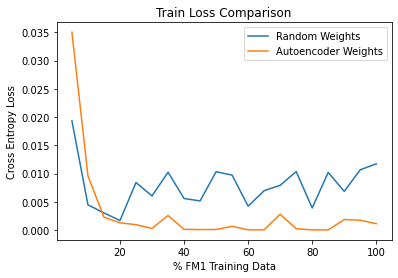

In [ ]:
plt.plot(percentages, train_losses_rand, label="Random Weights")
plt.plot(percentages, train_losses_equiv, label="Autoencoder Weights")
plt.title("Train Loss Comparison")
plt.xlabel("% FM1 Training Data")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

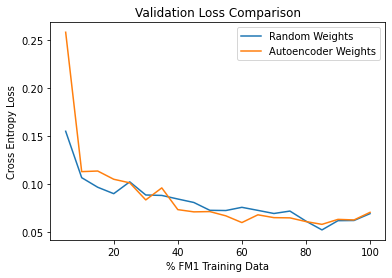

In [ ]:
plt.plot(percentages, val_losses_rand, label="Random Weights")
plt.plot(percentages, val_losses_equiv, label="Autoencoder Weights")
plt.title("Validation Loss Comparison")
plt.xlabel("% FM1 Training Data")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

5. Provide the final accuracy on the training, validation, and test set for the best model you
obtained for each of the two initialisation strategies.

In [ ]:
print("Best RW model", np.argmin(val_losses_rand), np.min(val_losses_rand))
print("Best % data", (np.argmin(val_losses_rand)+1)*5)
print("Validation Accuracy", val_acc_rand[np.argmin(val_losses_rand)])
print("Train Accuracy", train_acc_rand[np.argmin(val_losses_rand)])
print("Test Accuracy", test_acc_rand[np.argmin(val_losses_rand)])

Best RW model 19 0.02108701572938962
Best % data 100
Validation Accuracy 0.9961939102564102
Train Accuracy 0.9999194587628866
Test Accuracy 0.9967948717948718


In [ ]:
print("Best AEW model", np.argmin(val_losses_equiv), np.min(val_losses_equiv))
print("Best % data", (np.argmin(val_losses_equiv)+1)*5)
print("Validation Accuracy", val_acc_equiv[np.argmin(val_losses_equiv)])
print("Train Accuracy", train_acc_equiv[np.argmin(val_losses_equiv)])
print("Test Accuracy", test_acc_equiv[np.argmin(val_losses_equiv)])

Best AEW model 17 0.01902776625061401
Best % data 90
Validation Accuracy 0.9963942307692307
Train Accuracy 0.9999553571428571
Test Accuracy 0.9967948717948718


# 3.5 Transfer learning

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

!pip install idx2numpy
import idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=5917d425618d355806d2aa0398591fbaa9e51ee39b4b0f5f6c0104e8130ab1ef
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./train-images-idx3-ubyte.gz # ! linux comand line
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./train-labels-idx1-ubyte.gz # curl is to grab someting from the internet 
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./t10k-images-idx3-ubyte.gz
!curl -fsS http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./t10k-labels-idx1-ubyte.gz

!gzip -d train-labels-idx1-ubyte.gz # uncompress with gzip
!gzip -d train-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz

### Data Extraction and filtering data into MNIST-1 and MNIST - 2:

In [ ]:
# importing the training images and splitting it into a training and validation set
train_data = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y_train_data = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
x_train = train_data[:50000,:]
y_train = y_train_data[:50000]

x_val = train_data[50000:,:]
y_val = y_train_data[50000:]

x_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

def filter(xs, ys, lbls):
  idxs = [i for (i, y) in enumerate(ys) if y in lbls] #labels from the original dataset 
  xsprime = np.zeros((len(idxs), xs.shape[1],xs.shape[2]))

  for (i, j) in enumerate(idxs):
    xsprime[i, :, :] = xs[j, :, :]

  ymap = dict([(y, yprime) for (yprime, y) in enumerate(lbls)])
  ysprime = [ymap[y] for y in ys[idxs]] #0,1,4,5,8 to 0,1,2,3,4

  return np.array(xsprime), np.array(ysprime) # gets us a 3 tensor and this is a 1-tensor 

fm1lbls                = [0, 1, 4, 5, 8]
fm1trainxs, fm1trainys = filter(x_train, y_train, fm1lbls)
fm1validxs, fm1validys = filter(x_val, y_val, fm1lbls)
fm1testxs, fm1testys   = filter(x_test, y_test, fm1lbls)

fm2lbls                = [2, 3, 6, 7, 9]
fm2trainxs, fm2trainys = filter(x_train, y_train, fm2lbls)
fm2validxs, fm2validys = filter(x_val, y_val, fm2lbls)
fm2testxs, fm2testys   = filter(x_test, y_test, fm2lbls)

In [ ]:
#Fashion MNIST-2 data

BATCH_SIZE = 128 # initialize batch size

# converting the array to tensors
fm2_trainx_tensor = torch.tensor(fm2trainxs, dtype=torch.float)
fm2_trainy_tensor = torch.tensor(fm2trainys, dtype=torch.float)
fm2_valx_tensor = torch.tensor(fm2validxs, dtype=torch.float)
fm2_valy_tensor = torch.tensor(fm2validys, dtype=torch.float)
fm2_testx_tensor = torch.tensor(fm2testxs, dtype=torch.float)
fm2_testy_tensor = torch.tensor(fm2testys, dtype=torch.float)

# create tensor datasets for the train, val, test tensors
fm2_trainset = torch.utils.data.TensorDataset(fm2_trainx_tensor, fm2_trainy_tensor)
fm2_valset = torch.utils.data.TensorDataset(fm2_valx_tensor, fm2_valy_tensor)
fm2_testset = torch.utils.data.TensorDataset(fm2_testx_tensor, fm2_testy_tensor)

# create data loaders for the train, val, test datasets
fm2_trainloader = torch.utils.data.DataLoader(fm2_trainset, batch_size=BATCH_SIZE, shuffle=True)
fm2_valloader = torch.utils.data.DataLoader(fm2_valset, batch_size=fm2_valx_tensor.shape[0], shuffle=True)
fm2_testloader = torch.utils.data.DataLoader(fm2_testset, batch_size=fm2_testx_tensor.shape[0], shuffle=True)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU IS AVAILABLE :D') 
else:  
    device = torch.device("cpu") 
    print('GPU not available')

GPU IS AVAILABLE :D


## 1. Implement a multi-class, convolutional neural network with cross-entropy loss for the Fashion-MNIST-2 data.

In [ ]:
# Initializing CNN for MNIST-2 dataset

class MNIST2_CNN(nn.Module):
    def __init__(self, p):
        super(MNIST2_CNN, self).__init__()
        # initializing two convolution layers
        self.conv1 = nn.Conv2d(1, 28, kernel_size=5)
        self.conv2 = nn.Conv2d(28, 20, kernel_size=3)
        self.drop_layer = nn.Dropout2d(p)

        # initializing the MLP layers
        self.fc1 = nn.Linear(20 * 10 * 10, 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 5)


    def forward(self, x):
        # max pooling on the 1st conv layer, with stride = 2
        x = F.max_pool2d(self.conv1(x), 2)
        # dropout layers for regularization
        x = self.drop_layer(x)
        x = F.relu(x)
        # max pooling on the 1st conv layer, with stride = 1
        x = F.max_pool2d(self.conv2(x), 1) 
        # dropout layers for regularization       
        x = self.drop_layer(x)
        x = F.relu(x)
        # flattening the matrix
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x = F.relu(self.fc1(x))
        x = self.drop_layer(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

In [ ]:
# function that trains the model and predicts on the test set
def train_evaluate(net, lr,optimizer,model_selection):
    EPOCHS = 30
    # choosing the learning rate
    LEARNING_RATE = lr

    # picking cost function and optimizer
    criterion = nn.CrossEntropyLoss()
    if optimizer == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
    if optimizer == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum = 0.9)

    # training the model:
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(EPOCHS):
        running_train_loss = 0.0
        num_of_train_batches = 0 
        running_train_acc = 0.0

        # training on each mini batch 
        for i, data in enumerate(fm2_trainloader):
            # set param grads to 0
            optimizer.zero_grad()

            # get inputs
            images, labels = data
            images, labels = Variable(images), Variable(labels)
            images = images.unsqueeze(1).to(device)
            labels = labels.type(torch.LongTensor).to(device)

            #forward + backward + optimize
            output = net(images)

            train_loss = criterion(output, labels)

            train_loss.backward()
            optimizer.step()
          
            running_train_loss += train_loss.item()

            num_of_train_batches += 1
            train_logits = net(images)
            _, train_predictions = torch.max(train_logits.data, 1)
            train_correct_predictions = (train_predictions.int() == labels.int()).sum()
            train_length = labels.size()[0]
            running_train_acc += train_correct_predictions/train_length


        train_losses.append(running_train_loss / num_of_train_batches)
        train_accuracies.append(running_train_acc / num_of_train_batches)

        running_val_loss = 0.0
        num_of_val_batches = 0 
        running_val_acc = 0.0

        for i, data in enumerate(fm2_valloader):
          # get inputs
          images, labels = data
          images, labels = Variable(images), Variable(labels)
          images = images.unsqueeze(1).to(device)
          labels = labels.type(torch.LongTensor).to(device)

          #forward + backward + optimize
          val_logits = net(images).to(device)
          val_loss = criterion(val_logits, labels)
          running_val_loss += val_loss.item()
          _, val_predictions = torch.max(val_logits.data, 1) 
          val_correct_predictions = (val_predictions.int() == labels.int()).sum()
          val_length = labels.size()[0]
          running_val_acc += val_correct_predictions/val_length
          num_of_val_batches += 1

        # storing the validation losses and accuracies
        val_losses.append(running_val_loss / num_of_val_batches)
        val_accuracies.append(running_val_acc / num_of_val_batches)

        
        if epoch % 3 == 0:
            print('Epoch: %d/%d,  train loss: %.6f train acc: %.6f  val loss: %.6f val acc: %.6f'%(epoch+1,EPOCHS,train_losses[epoch],train_accuracies[epoch],val_losses[epoch],val_accuracies[epoch]))


    # predicting on the trained model
    images = fm2_testx_tensor.unsqueeze(1).to(device)
    test_logits = net(images)
    labels = fm2_testy_tensor.type(torch.LongTensor).to(device)
    test_loss = criterion(test_logits.to(device), labels)
    _, test_predictions = torch.max(test_logits.data, 1) 
    test_correct_predictions = (test_predictions.int() == labels.int()).sum()
    test_length = labels.size()[0]
    final_test_accuracy = test_correct_predictions/test_length
    print('Test Accuracy: ', final_test_accuracy.item())
    if model_selection == 'True':
       return net, val_losses[-1]
    else:
       return net, train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy


# plotting the train and validation loss
def plot_loss(train_losses, val_losses):
    plt.plot(range(len(train_losses)), train_losses, label="Train")
    plt.plot(range(len(val_losses)), val_losses, label="Validation")
    plt.title("Loss per Epoch")
    plt.xlabel("Epoch no.")
    plt.ylabel("Cross Entropy Loss")
    plt.legend()
    plt.show()

# plotting the train and validation accuracy
def plot_accuracy(train_accuracy, val_accuracy):
    plt.plot(range(len(train_accuracy)), train_accuracy, label="Train")
    plt.plot(range(len(val_accuracy)), val_accuracy, label="Validation")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epoch no.")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## 2. Iteratively tune your model structure and hyperparameters using the validation set of Fashion-MNIST-2, until you arrive at a model performance you are comfortable with.

### Grid search on learning rate, optimizer, dropout probabilities:

In [ ]:
# Grid search on learning rate, optimizer, dropout probabilities:

lr = [0.001, 0.01]
optimizer = ['Adam','SGD']
dropouts = [0, 0.2, 0.3]
val_losses = np.zeros((len(lr),len(optimizer),len(dropouts)))


for i in range(len(lr)):
    for j in range(len(optimizer)):
        for k in range(len(dropouts)):
            print('Learning rate: ',lr[i], ' Optimizer: ', optimizer[j],' Dropout: ',dropouts[k])
            print('-------------------------------------------------------------------------------------')
            CNN_MNIST2 = MNIST2_CNN(dropouts[k]).to(device)
            _, val_losses[i,j,k] = train_evaluate(CNN_MNIST2, lr[i], optimizer[j], model_selection = 'True')
            print('-------------------------------------------------------------------------------------')

best_lr, best_opt, best_p = np.argwhere(val_losses == np.min(val_losses))[0]
print('Best params: ',lr[best_lr], optimizer[best_opt], dropouts[best_p])

Learning rate:  0.001  Optimizer:  Adam  Dropout:  0
-------------------------------------------------------------------------------------
Epoch: 1/30,  train loss: 0.682359 train acc: 0.873534  val loss: 0.255937 val acc: 0.893668
Epoch: 4/30,  train loss: 0.154060 train acc: 0.949900  val loss: 0.183637 val acc: 0.927638
Epoch: 7/30,  train loss: 0.106388 train acc: 0.969748  val loss: 0.237089 val acc: 0.929849
Epoch: 10/30,  train loss: 0.072131 train acc: 0.983538  val loss: 0.212586 val acc: 0.934271
Epoch: 13/30,  train loss: 0.045409 train acc: 0.990913  val loss: 0.242330 val acc: 0.930452
Epoch: 16/30,  train loss: 0.036557 train acc: 0.994101  val loss: 0.290844 val acc: 0.926834
Epoch: 19/30,  train loss: 0.030598 train acc: 0.996333  val loss: 0.373492 val acc: 0.930452
Epoch: 22/30,  train loss: 0.021520 train acc: 0.997848  val loss: 0.336757 val acc: 0.935075
Epoch: 25/30,  train loss: 0.015224 train acc: 0.998605  val loss: 0.434094 val acc: 0.927638
Epoch: 28/30,  tra

In [ ]:
# Training on the best model parameters

CNN_MNIST2 = MNIST2_CNN(dropouts[best_p]).to(device)
best_MNIST2 , train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy = train_evaluate(CNN_MNIST2, lr[best_lr], optimizer[best_opt], model_selection = 'False')

Epoch: 1/30,  train loss: 0.643858 train acc: 0.752528  val loss: 0.383337 val acc: 0.838392
Epoch: 4/30,  train loss: 0.292628 train acc: 0.892625  val loss: 0.284133 val acc: 0.892462
Epoch: 7/30,  train loss: 0.243180 train acc: 0.908328  val loss: 0.253353 val acc: 0.903719
Epoch: 10/30,  train loss: 0.220962 train acc: 0.914467  val loss: 0.231087 val acc: 0.914573
Epoch: 13/30,  train loss: 0.208674 train acc: 0.920765  val loss: 0.231470 val acc: 0.914372
Epoch: 16/30,  train loss: 0.193223 train acc: 0.928341  val loss: 0.225943 val acc: 0.910151
Epoch: 19/30,  train loss: 0.182562 train acc: 0.931923  val loss: 0.213879 val acc: 0.918392
Epoch: 22/30,  train loss: 0.174216 train acc: 0.935275  val loss: 0.215264 val acc: 0.922613
Epoch: 25/30,  train loss: 0.167488 train acc: 0.937064  val loss: 0.209542 val acc: 0.922010
Epoch: 28/30,  train loss: 0.162120 train acc: 0.939216  val loss: 0.209409 val acc: 0.922211
Test Accuracy:  0.920799970626831


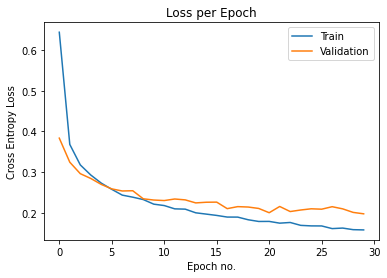

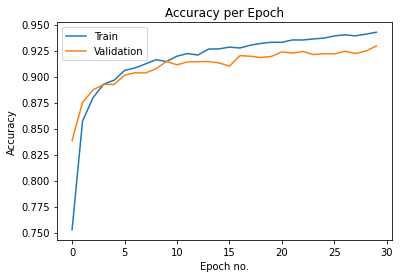

Test Accuracy: 0.920800


In [ ]:
# plotting losses and accuracy for the best MNIST-2 model
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)
print("Test Accuracy: %.6f"%final_test_accuracy.item())

## 3. Implement a multi-class, convolutional neural network with cross-entropy loss for the Fashion-MNIST-1 data, which shares the same structure as the one you used for the Fashion-MNIST-2 data.

In [ ]:
# Extracting MNIST-1 DATA

fm1_trainx_tensor = torch.tensor(fm1trainxs, dtype=torch.float)
fm1_trainy_tensor = torch.tensor(fm1trainys, dtype=torch.float)
fm1_valx_tensor = torch.tensor(fm1validxs, dtype=torch.float)
fm1_valy_tensor = torch.tensor(fm1validys, dtype=torch.float)
fm1_testx_tensor = torch.tensor(fm1testxs, dtype=torch.float)
fm1_testy_tensor = torch.tensor(fm1testys, dtype=torch.float)

# create tensor dataset for the train, val, test tensors
fm1_trainset = torch.utils.data.TensorDataset(fm1_trainx_tensor, fm1_trainy_tensor)
fm1_valset = torch.utils.data.TensorDataset(fm1_valx_tensor, fm1_valy_tensor)
fm1_testset = torch.utils.data.TensorDataset(fm1_testx_tensor, fm1_testy_tensor)

# create data loaders for the train, val, test datasets
fm1_trainloader = torch.utils.data.DataLoader(fm1_trainset, batch_size=BATCH_SIZE, shuffle=True)
fm1_valloader = torch.utils.data.DataLoader(fm1_valset, batch_size=fm1_valx_tensor.shape[0], shuffle=True)
fm1_testloader = torch.utils.data.DataLoader(fm1_testset, batch_size=fm1_testx_tensor.shape[0], shuffle=True)

In [ ]:
# Initializing CNN
# Transfer Learning

# Creating a class for the MNIST-1 data that uses the weights from the best MNIST-2 model
# for the CNN and MLP layers (except the classification layer)
# MNIST1 and MNIST2 has the same architecture
class MNIST1_CNN(nn.Module):
    def __init__(self, p):
        super(MNIST1_CNN, self).__init__()
        # initializing the 1st conv layer 
        self.conv1 = nn.Conv2d(1, 28, kernel_size=5)
        # using weights of 1st conv layer from MNIST2 for conv1 in MNIST1 
        self.conv1.weight.data = best_MNIST2.conv1.weight.data
        # initializing the 1st conv layer 
        self.conv2 = nn.Conv2d(28, 20, kernel_size=3)
        # using weights of 2nd conv layer from MNIST2 for conv2 in MNIST1
        self.conv2.weight.data = best_MNIST2.conv2.weight.data
        # adding dropout
        self.drop_layer = nn.Dropout2d(p)
        self.fc1 = nn.Linear(20 * 10 * 10, 500)
        # using weights of linear layers from MNIST2 for linear layers in MNIST1
        self.fc1.weight.data = best_MNIST2.fc1.weight.data
        self.fc2 = nn.Linear(500, 100)
        self.fc2.weight.data = best_MNIST2.fc2.weight.data
        self.fc3 = nn.Linear(100, 5)


    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = self.drop_layer(x)
        x = F.relu(x)
        x = F.max_pool2d(self.conv2(x), 1)        
        x = self.drop_layer(x)
        x = F.relu(x)
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = F.relu(self.fc1(x))
        x = self.drop_layer(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

In [ ]:
CNN_MNIST1 = MNIST1_CNN(dropouts[best_p]).to(device)
best_MNIST1 , train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy = train_evaluate(CNN_MNIST1, lr[best_lr], optimizer[best_opt], model_selection='False')

Epoch: 1/50,  train loss: 0.236377 train acc: 0.922155  val loss: 0.210314 val acc: 0.925628
Epoch: 4/50,  train loss: 0.117672 train acc: 0.955520  val loss: 0.212244 val acc: 0.926030
Epoch: 7/50,  train loss: 0.110393 train acc: 0.957832  val loss: 0.206611 val acc: 0.932462
Epoch: 10/50,  train loss: 0.109548 train acc: 0.960661  val loss: 0.202724 val acc: 0.931055
Epoch: 13/50,  train loss: 0.101681 train acc: 0.961018  val loss: 0.217186 val acc: 0.928241
Epoch: 16/50,  train loss: 0.100298 train acc: 0.961855  val loss: 0.220168 val acc: 0.932060
Epoch: 19/50,  train loss: 0.095237 train acc: 0.963094  val loss: 0.219439 val acc: 0.929045
Epoch: 22/50,  train loss: 0.094072 train acc: 0.965085  val loss: 0.209611 val acc: 0.929447
Epoch: 25/50,  train loss: 0.092224 train acc: 0.967639  val loss: 0.228333 val acc: 0.928040
Epoch: 28/50,  train loss: 0.085367 train acc: 0.967924  val loss: 0.222268 val acc: 0.928442
Epoch: 31/50,  train loss: 0.085142 train acc: 0.968952  val lo

### 4. Compare using random weights to those obtained by training on Fashion-MNIST-2 – you should randomly re-initialise the classification layer though – to initialise the multi-class, convolutional neural network by plotting the training and validation loss for both options when you use 5%, 10%, . . . , 100% of the available Fashion-MNIST-1 training data to train your model. Is there a point where one initialisation option is superior to the other? Is one option always superior to the other?

In [ ]:
# Creating a class for the MNIST-1 data that uses random weights
# for the CNN and MLP layers
# MNIST1 and MNIST2 has the same architecture


class Random_MNIST1_CNN(nn.Module):
    def __init__(self, p):
        super(Random_MNIST1_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 28, kernel_size=5)
        # using random weights for conv layers
        # initializing the 1st conv layer 
        self.conv2 = nn.Conv2d(28, 20, kernel_size=3)
        # adding dropout
        self.drop_layer = nn.Dropout2d(p)
        self.fc1 = nn.Linear(20 * 10 * 10, 500)
        # using random weights for linear layers
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 5)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = self.drop_layer(x)
        x = F.relu(x)
        x = F.max_pool2d(self.conv2(x), 1)        
        x = self.drop_layer(x)
        x = F.relu(x)
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = F.relu(self.fc1(x))
        x = self.drop_layer(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

In [ ]:
Random_CNN_MNIST1 = Random_MNIST1_CNN(dropouts[best_p]).to(device)
best_random_MNIST1 , train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy = train_evaluate(Random_CNN_MNIST1, lr[best_lr], optimizer[best_opt], model_selection = 'False')

Epoch: 1/30,  train loss: 0.529768 train acc: 0.786335  val loss: 0.418905 val acc: 0.807437
Epoch: 4/30,  train loss: 0.283845 train acc: 0.892387  val loss: 0.280119 val acc: 0.887839
Epoch: 7/30,  train loss: 0.240318 train acc: 0.909405  val loss: 0.250573 val acc: 0.903518
Epoch: 10/30,  train loss: 0.218535 train acc: 0.919726  val loss: 0.223104 val acc: 0.915176
Epoch: 13/30,  train loss: 0.203063 train acc: 0.924750  val loss: 0.219077 val acc: 0.918191
Epoch: 16/30,  train loss: 0.189887 train acc: 0.929174  val loss: 0.214033 val acc: 0.918794
Epoch: 19/30,  train loss: 0.179339 train acc: 0.933479  val loss: 0.203525 val acc: 0.924422
Epoch: 22/30,  train loss: 0.170614 train acc: 0.935311  val loss: 0.204045 val acc: 0.919196
Epoch: 25/30,  train loss: 0.162306 train acc: 0.939741  val loss: 0.198767 val acc: 0.924422
Epoch: 28/30,  train loss: 0.155661 train acc: 0.940412  val loss: 0.212106 val acc: 0.920201
Test Accuracy:  0.9225999712944031


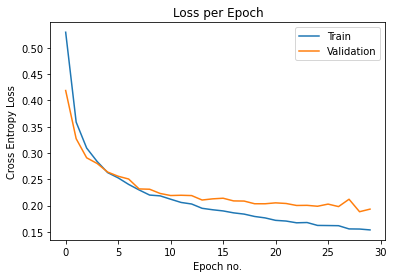

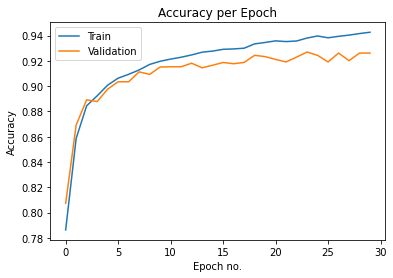

Test Accuracy: 0.922600


In [ ]:
# plotting losses and accuracy for the best MNIST-1 model
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)
print("Test Accuracy: %.6f"%final_test_accuracy.item())

 ## Calculating for 5%, 10%, . . . , 100% of the available Fashion-MNIST-1training data

In [ ]:
# splitting the images and labels into 20 splits
def splitting_xs(dataset, i): 
  ind = np.int(np.round(dataset.shape[0]/20))
  dataset_new = dataset[:(i+1)*ind, :]
  return dataset_new

def splitting_ys(dataset,i):
  ind = np.int(np.round(dataset.shape[0]/20))
  dataset_new = dataset[:(i+1)*ind]
  return dataset_new

xs_splits = []
ys_splits = []

for i in range(19):
  xs_splits.append(splitting_xs(fm1_trainx_tensor, i))
  ys_splits.append(splitting_ys(fm1_trainy_tensor, i))

xs_splits.append(fm1_trainx_tensor)
ys_splits.append(fm1_trainy_tensor)
len(xs_splits), len(ys_splits)

(20, 20)

In [ ]:
trainset_splits = []

for i in range(20):
    trainset_splits.append(torch.utils.data.TensorDataset(xs_splits[i], ys_splits[i]))

trainloader_splits = []
for i in range(20):
    trainloader_splits.append(torch.utils.data.DataLoader(trainset_splits[i], batch_size=BATCH_SIZE, shuffle=True))

# parallelizing val CUDA
# Random_CNN_MNIST1, lr[0], optimizer[0], trainloader_splits[i], fm1_valloader, fm1_testx_tensor, fm1_testy_tensor
def training_loop_CNN(model, lr, optimizer, trainloader, valloader, testx_tensor, testy_tensor):
    net = model
    LEARNING_RATE = lr
    EPOCHS = 20

    # picking cost function and optimizer
    criterion = nn.CrossEntropyLoss()
    if optimizer == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
    if optimizer == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum = 0.9)
    # optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

    # training the model:
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(EPOCHS):
        running_train_loss = 0.0
        running_train_acc = 0.0

        for i, data in enumerate(trainloader):
            # set param grads to 0
            optimizer.zero_grad()

            # get inputs
            images, labels = data
            images, labels = Variable(images), Variable(labels)
            images = images.unsqueeze(1).to(device)
            labels = labels.type(torch.LongTensor).to(device)

            #forward + backward + optimize
            output = net(images)

            train_loss = criterion(output, labels)

            train_loss.backward()
            optimizer.step()
          
            running_train_loss += train_loss.item()

            #num_of_train_batches += 1
            train_logits = net(images)
            _, train_predictions = torch.max(train_logits.data, 1)
            train_correct_predictions = (train_predictions.int() == labels.int()).sum()
            train_length = labels.size()[0]
            running_train_acc += train_correct_predictions/train_length


        train_losses.append(running_train_loss / len(trainloader))
        train_accuracies.append(running_train_acc / len(trainloader))

        running_val_loss = 0.0
        running_val_acc = 0.0

        for i, data in enumerate(valloader):
          images, labels = data
          images, labels = Variable(images), Variable(labels)
          images = images.unsqueeze(1).to(device)
          labels = labels.type(torch.LongTensor).to(device)

          val_logits = net(images).to(device)
          val_loss = criterion(val_logits, labels)
          running_val_loss += val_loss.item()
          _, val_predictions = torch.max(val_logits.data, 1) 
          val_correct_predictions = (val_predictions.int() == labels.int()).sum()
          val_length = labels.size()[0]
          running_val_acc += val_correct_predictions/val_length


        val_losses.append(running_val_loss / len(valloader))
        val_accuracies.append(running_val_acc / len(valloader))

        
        if epoch % 5 == 0:
            print('Epoch: %d/%d,  train loss: %.6f train acc: %.6f  val loss: %.6f val acc: %.6f'%(epoch+1,EPOCHS,train_losses[epoch],train_accuracies[epoch],val_losses[epoch],val_accuracies[epoch]))


    images = testx_tensor.unsqueeze(1).to(device)
    labels = testy_tensor.type(torch.LongTensor).to(device)
    test_logits = net(images)
    test_loss = criterion(test_logits.to(device), labels)
    _, test_predictions = torch.max(test_logits.data, 1) 
    test_correct_predictions = (test_predictions.int() == labels.int()).sum()
    test_length = testy_tensor.size()[0]
    final_test_accuracy = test_correct_predictions.item()/test_length
    print('Test Accuracy: ',final_test_accuracy)

    return train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy

In [ ]:
# lists to store the val, train, test losses and accuracies for the random weights model
train_losses_rand = []
val_losses_rand = []
train_acc_rand = []
val_acc_rand = []
test_acc_rand = []

# Creating an object for Random CNN MNIST1
Random_CNN_MNIST1 = Random_MNIST1_CNN(dropouts[best_p]).to(device)
# Train the model for 5%, 10%....100% of data in a loop
for i in range(20):
    print('For ', (i+1)*5,'% of the train data')
    print('---------------------------------------------------------------------------------------')
    train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy = training_loop_CNN(Random_CNN_MNIST1, lr[best_lr], optimizer[best_opt], trainloader_splits[i], fm1_valloader, fm1_testx_tensor, fm1_testy_tensor)
    train_losses_rand.append(np.min(train_losses))
    val_losses_rand.append(np.min(val_losses))
    train_acc_rand.append(train_accuracies[np.argmin(val_losses)])
    val_acc_rand.append(val_accuracies[np.argmin(val_losses)])
    test_acc_rand.append(final_test_accuracy)
    print('---------------------------------------------------------------------------------------')

For  5 % of the train data
---------------------------------------------------------------------------------------
Epoch: 1/20,  train loss: 1.969724 train acc: 0.446013  val loss: 1.161508 val acc: 0.554826
Epoch: 6/20,  train loss: 0.273448 train acc: 0.920159  val loss: 0.259172 val acc: 0.920000
Epoch: 11/20,  train loss: 0.155037 train acc: 0.953721  val loss: 0.227571 val acc: 0.934925
Epoch: 16/20,  train loss: 0.134549 train acc: 0.957096  val loss: 0.197928 val acc: 0.942687
Test Accuracy:  0.944
---------------------------------------------------------------------------------------
For  10 % of the train data
---------------------------------------------------------------------------------------
Epoch: 1/20,  train loss: 0.148023 train acc: 0.956735  val loss: 0.196064 val acc: 0.943682
Epoch: 6/20,  train loss: 0.115276 train acc: 0.969579  val loss: 0.164760 val acc: 0.949453
Epoch: 11/20,  train loss: 0.091719 train acc: 0.975000  val loss: 0.153836 val acc: 0.953035
Epoch

In [ ]:
# lists to store the val, train, test losses and accuracies for the Transfer Learning Model
train_losses_equiv = []
val_losses_equiv = []
train_acc_equiv = []
val_acc_equiv = []
test_acc_equiv = []

# Creating an object for Transfer Learning CNN MNIST1
CNN_MNIST1 = MNIST1_CNN(dropouts[best_p]).to(device)
# Train the model for 5%, 10%....100% of data in a loop
for i in range(20):
    print('For ', (i+1)*5,'% of the train data')
    print('---------------------------------------------------------------------------------------')
    train_losses, train_accuracies, val_losses, val_accuracies, final_test_accuracy = training_loop_CNN(CNN_MNIST1, lr[best_lr], optimizer[best_opt], trainloader_splits[i], 
                                                                                                        fm1_valloader, fm1_testx_tensor, fm1_testy_tensor)
    train_losses_equiv.append(np.min(train_losses))
    val_losses_equiv.append(np.min(val_losses))
    train_acc_equiv.append(train_accuracies[np.argmin(val_losses)])
    val_acc_equiv.append(val_accuracies[np.argmin(val_losses)])
    test_acc_equiv.append(final_test_accuracy)
    print('---------------------------------------------------------------------------------------')

For  5 % of the train data
---------------------------------------------------------------------------------------
Epoch: 1/20,  train loss: 1.598381 train acc: 0.547600  val loss: 0.791775 val acc: 0.737313
Epoch: 6/20,  train loss: 0.163767 train acc: 0.951345  val loss: 0.195118 val acc: 0.939502
Epoch: 11/20,  train loss: 0.085791 train acc: 0.976562  val loss: 0.163757 val acc: 0.950448
Epoch: 16/20,  train loss: 0.074535 train acc: 0.983876  val loss: 0.146323 val acc: 0.957015
Test Accuracy:  0.9552
---------------------------------------------------------------------------------------
For  10 % of the train data
---------------------------------------------------------------------------------------
Epoch: 1/20,  train loss: 0.097427 train acc: 0.972313  val loss: 0.147809 val acc: 0.957015
Epoch: 6/20,  train loss: 0.056730 train acc: 0.979321  val loss: 0.127643 val acc: 0.961592
Epoch: 11/20,  train loss: 0.049118 train acc: 0.983203  val loss: 0.113236 val acc: 0.967761
Epoc

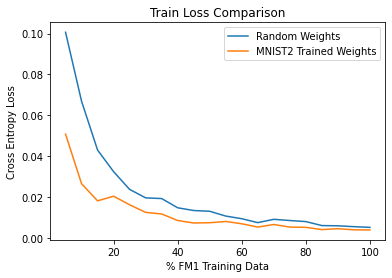

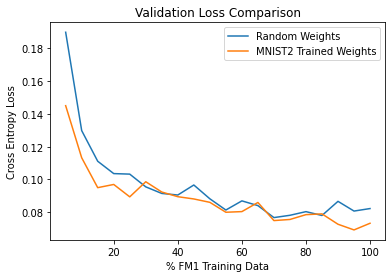

In [ ]:
percentages = np.linspace(5,100,20)

plt.plot(percentages, train_losses_rand, label="Random Weights")
plt.plot(percentages, train_losses_equiv, label="MNIST2 Trained Weights")
plt.title("Train Loss Comparison")
plt.xlabel("% FM1 Training Data")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

plt.plot(percentages, val_losses_rand, label="Random Weights")
plt.plot(percentages, val_losses_equiv, label="MNIST2 Trained Weights")
plt.title("Validation Loss Comparison")
plt.xlabel("% FM1 Training Data")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

## 5. Provide the final accuracy on the training, validation, and test set for the best model you obtained for each of the two initialisation strategies.

In [ ]:
print("Best Random Weight Model => ", np.argmin(val_losses_rand), "with min val loss = ",np.min(val_losses_rand))
print("Best % data", (np.argmin(val_losses_rand)+1)*5)
print("Validation Accuracy: ", val_acc_rand[np.argmin(val_losses_rand)].item()*100, "%")
print("Train Accuracy: ", train_acc_rand[np.argmin(val_losses_rand)].item()*100, "%")
print("Test Accuracy: ", test_acc_rand[np.argmin(val_losses_rand)]*100, "%")

Best Random Weight Model =>  13 with min val loss =  0.07669490575790405
Best % data 70
Validation Accuracy:  98.44776391983032 %
Train Accuracy:  99.6941089630127 %
Test Accuracy:  98.36 %


In [ ]:
print("Best Transfer Learning Model =>", np.argmin(val_losses_equiv), "with min val loss = ", np.min(val_losses_equiv))
print("Best % data", (np.argmin(val_losses_equiv)+1)*5)
print("Validation Accuracy: ", val_acc_equiv[np.argmin(val_losses_equiv)].item()*100, "%")
print("Train Accuracy: ", train_acc_equiv[np.argmin(val_losses_equiv)].item()*100, "%")
print("Test Accuracy: ", test_acc_equiv[np.argmin(val_losses_equiv)]*100, "%")

Best Transfer Learning Model => 18 with min val loss =  0.06916215270757675
Best % data 95
Validation Accuracy:  98.54726791381836 %
Train Accuracy:  99.84459280967712 %
Test Accuracy:  98.36 %
